In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import sys 
from sklearn.impute import SimpleImputer
import random
from plotly.offline import iplot
from plotnine import ggplot, aes, geom_line, geom_bar, geom_point, labs, coord_flip, theme_xkcd, geom_smooth
import json 
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

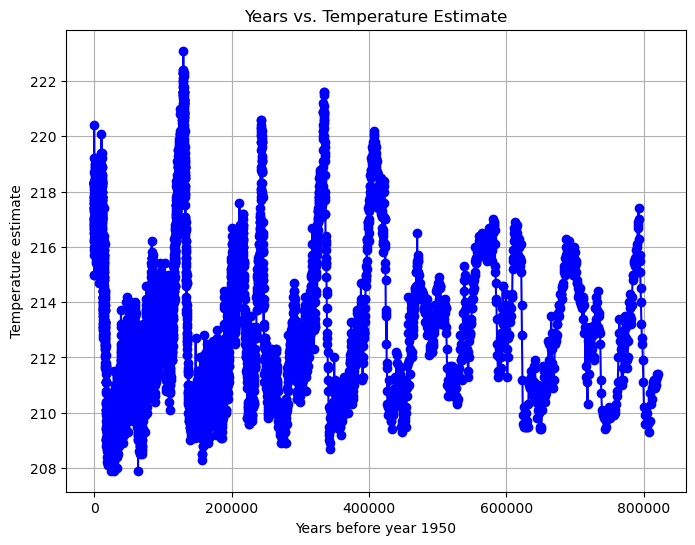

In [2]:
epica = pd.read_excel('data/epicaDC.deuttemp.EDC3-AICC.xls')

# Extracting columns 3 (EDC3 age scale) and 5 (Temperature estimate)
edc3_age = epica['EDC3béta']
temperature_estimate = epica['temp']

# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(edc3_age, temperature_estimate, marker='o', linestyle='-', color='blue')
plt.xlabel('Years before year 1950')
plt.ylabel('Temperature estimate')
plt.title('Years vs. Temperature Estimate')
plt.grid(True)
plt.show()

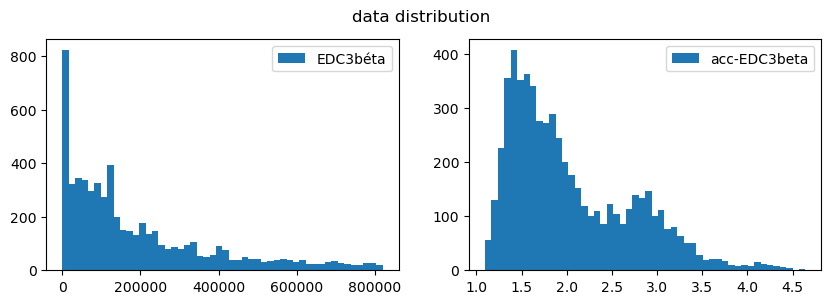

In [3]:
fig, axs = plt.subplots(1,2, figsize=(10,3)) # 1 row, 3 columns
axs[0].hist(epica['EDC3béta'],label="EDC3béta",bins=50)
axs[0].legend()

axs[1].hist(epica['acc-EDC3beta'],label="acc-EDC3beta", bins=50)
axs[1].legend()
plt.suptitle("data distribution")
plt.show()

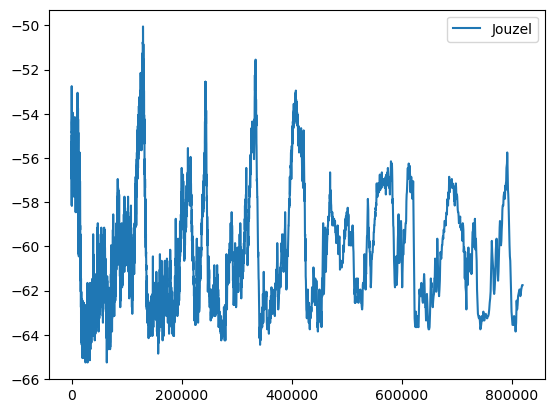

In [4]:
jouzel =pd.read_csv('data/jouzel.csv',encoding='Latin')

def kelvin_to_celsius(temp):
    return temp - 273.15
jouzel['celsius'] = jouzel['temp'].apply(kelvin_to_celsius)
plt.plot(jouzel['EDC3béta'],jouzel['celsius'], label = 'Jouzel')

plt.legend()
plt.show()

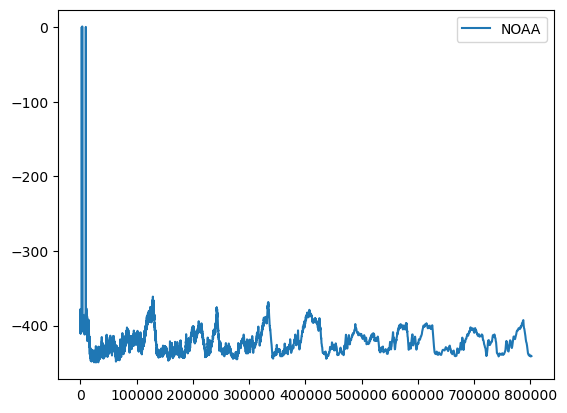

In [5]:
noaa =pd.read_csv('data/Temp data NOAA.csv',skiprows=range(91),delimiter=r"\s+")
plt.plot(noaa['Age'],noaa['Deuterium'], label = 'NOAA')
plt.legend()
plt.show()

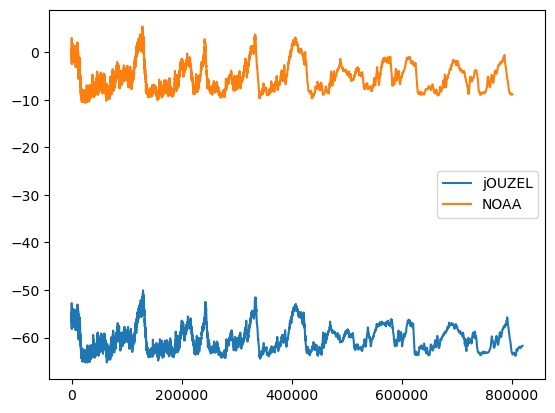

In [6]:
plt.plot(jouzel['EDC3béta'],jouzel['celsius'], label = 'jOUZEL')
plt.plot(noaa['Age'],noaa['Temperature'], label = 'NOAA')
plt.legend()
plt.show()

# CO2

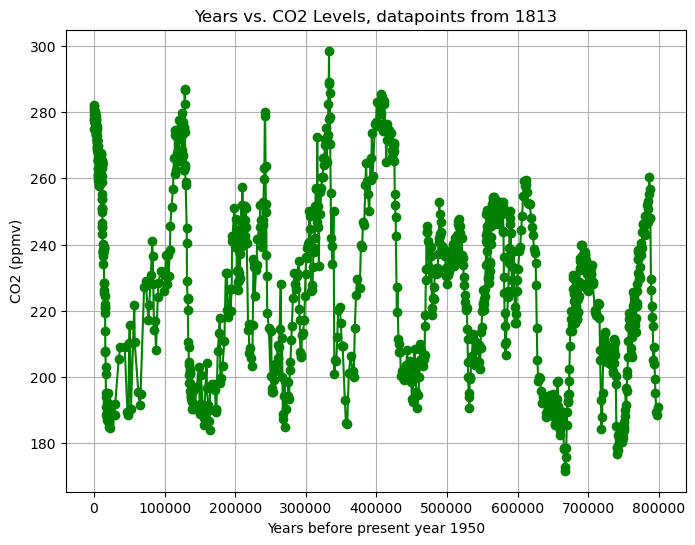

In [7]:
nature = pd.read_excel('data/C02 Nature Paper.xlsx', skiprows=6, sheet_name='3.  Composite CO2')

# Handling NaN values (if any)
nature.dropna(subset=['EDC3_gas_a (yr)', 'CO2 (ppmv)'], inplace=True)

# Extract data from the first two columns
years = nature['EDC3_gas_a (yr)']
co2 = nature['CO2 (ppmv)']

# Plotting the extracted data with the same formatting
plt.figure(figsize=(8, 6))
plt.plot(years, co2, marker='o', linestyle='-', color='green')
plt.xlabel('Years before present year 1950')
plt.ylabel('CO2 (ppmv)')
plt.title('Years vs. CO2 Levels, datapoints from 1813')
plt.grid(True)
plt.show()

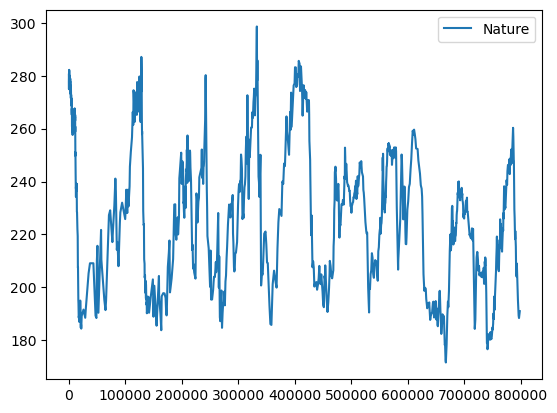

In [8]:
plt.plot(nature['EDC3_gas_a (yr)'],nature['CO2 (ppmv)'], label = 'Nature')
plt.legend()
plt.show()

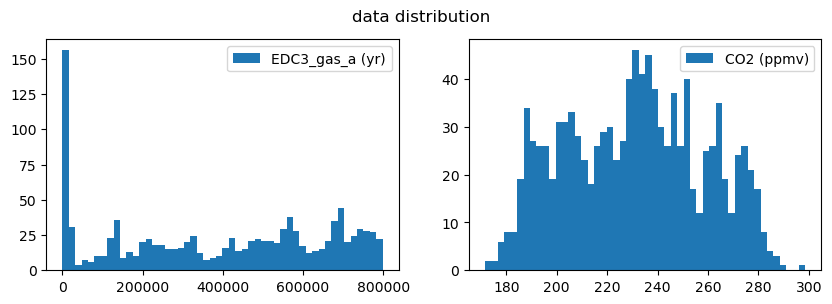

In [9]:
fig, axs = plt.subplots(1,2, figsize=(10,3)) # 1 row, 3 columns
# Age
axs[0].hist(nature['EDC3_gas_a (yr)'],label="EDC3_gas_a (yr)",bins=50)
axs[0].legend()
# Temperature
axs[1].hist(nature['CO2 (ppmv)'],label="CO2 (ppmv)", bins=50)
axs[1].legend()
plt.suptitle("data distribution")
plt.show()

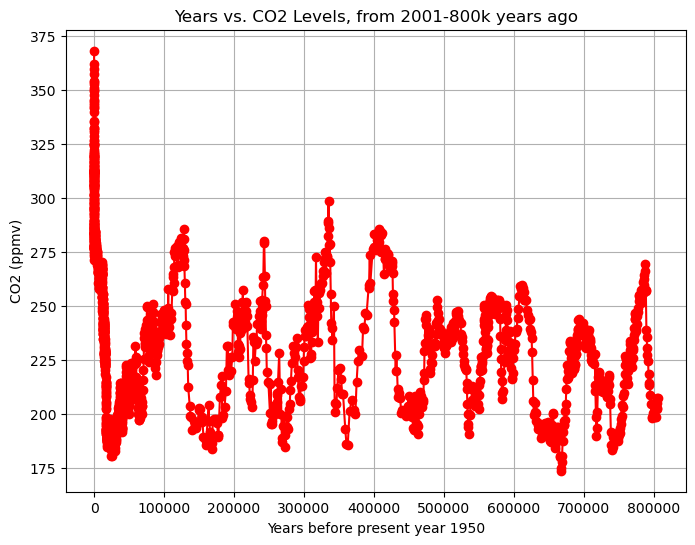

In [10]:
grl = pd.read_excel('data/grl52461-sup-0003-supplementary.xlsx', skiprows=14, sheet_name='CO2 Composite')

# Handling NaN values (if any)
grl.dropna(subset=['Gasage (yr BP) ', 'CO2 (ppmv)'], inplace=True)

# Extract data from the first two columns
Gasage = grl['Gasage (yr BP) ']
co22 = grl['CO2 (ppmv)']

# Plotting the extracted data with the same formatting
plt.figure(figsize=(8, 6))
plt.plot(Gasage, co22, marker='o', linestyle='-', color='red')
plt.xlabel('Years before present year 1950')
plt.ylabel('CO2 (ppmv)')
plt.title('Years vs. CO2 Levels, from 2001-800k years ago')
plt.grid(True)
plt.show()

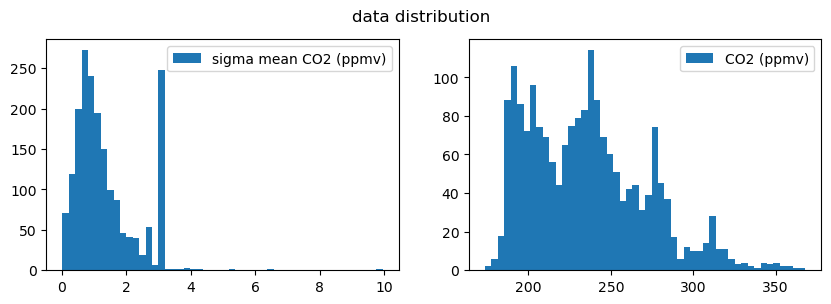

In [11]:
fig, axs = plt.subplots(1,2, figsize=(10,3)) # 1 row, 3 columns
axs[0].hist(grl['sigma mean CO2 (ppmv)'],label="sigma mean CO2 (ppmv)",bins=50)
axs[0].legend()
axs[1].hist(grl['CO2 (ppmv)'],label="CO2 (ppmv)", bins=50)
axs[1].legend()
plt.suptitle("data distribution")
plt.show()

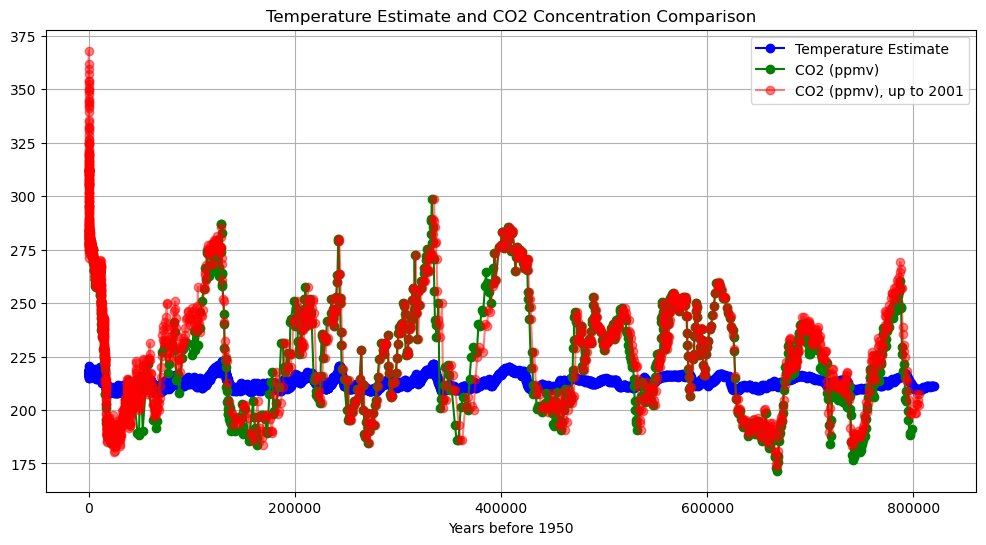

In [12]:
plt.figure(figsize=(12, 6))

# Plotting the first dataset
plt.plot(edc3_age, temperature_estimate, marker='o', linestyle='-', color='blue', label='Temperature Estimate')

# Plotting the second dataset
plt.plot(years, co2, marker='o', linestyle='-', color='green', label='CO2 (ppmv)')

# Plotting the third dataset
plt.plot(Gasage, co22, marker='o', linestyle='-', color='red', label='CO2 (ppmv), up to 2001', alpha=0.5)

plt.xlabel('Years before 1950')
plt.grid(True)
plt.legend()
plt.title('Temperature Estimate and CO2 Concentration Comparison')
plt.show()

# polar ice
Polar Ice. form part of the debate on climate change, Polar ice arises when sea water freezes, polar Ice covers 7% of the earths surface and it also covers 12% of the worlds oceans and according to According to the National Snow Ice and Data Center (NSIDC), sea ice covers just over 9.6 million square miles of the Earth. That's about 2.5 times the size of Canada!. Polar ice helps to regulate heat. It insulates the relatively warm ocean water from the cold polar atmosphere except where cracks, or leads, in the ice allow exchange of heat and water vapor from ocean to atmosphere in winter. The number of leads determines where and how much heat and water are lost to the atmosphere, which may affect local cloud cover and precipitation. As sea ice extent shrinks and breaks up, exposed ocean waters increase.

In 1979, satellites started monitoring sea ice, to keep an eye on how much of it there was. This has raised alarm NSIDC reported that in January 2017, there was about 5.17 million square miles of Arctic sea ice recorded. This was the lowest recorded amount since 1979. In fact, it's 100,000 square miles less Arctic sea ice than there was in January 2016.

This means that as this ice begins to melt and disapper water levels will begin to rise and this gives rise to flooding. Warmer temperatures in the Arctic and the Antarctic can also affect how the world's atmosphere behaves, as air moves around the Earth. There is one other factor at play here the question of wildlife, Polar bears seals penguins all need this ice to live. if it disappers and reduces year and year. they are also at risk.

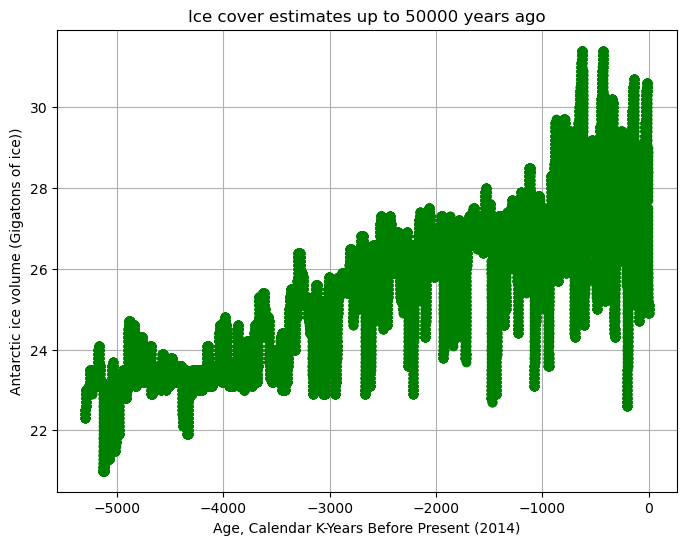

In [70]:
seaice = pd.read_csv('data/deboer2014.txt', delimiter='\t', na_values=-999, skiprows=114)
year = seaice['age_calkaBP']
ice_volume = seaice['AnIS-V']
temp_anom = seaice['tempanomNH']

# Plotting the extracted data
plt.figure(figsize=(8, 6))
plt.plot(year, ice_volume,  marker='o', color='green')
plt.xlabel('Age, Calendar K-Years Before Present (2014)')  
plt.ylabel('Antarctic ice volume (Gigatons of ice))')  
plt.title('Ice cover estimates up to 50000 years ago')
plt.grid(True)
plt.show()

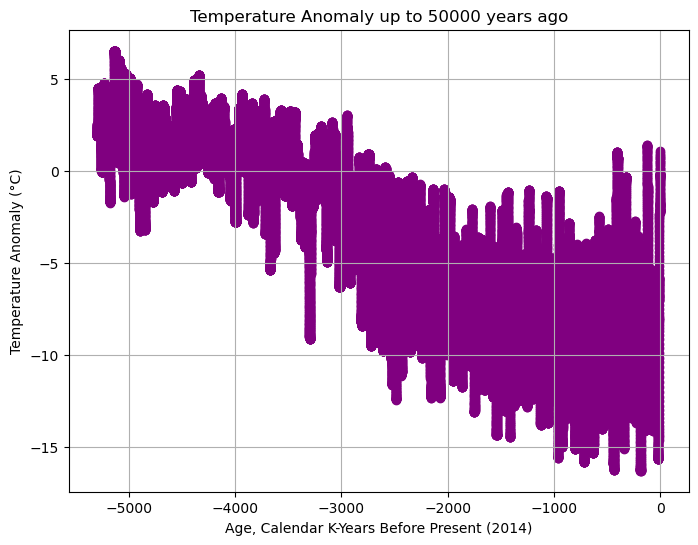

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(year, temp_anom, color='purple')
plt.xlabel('Age, Calendar K-Years Before Present (2014)')  
plt.ylabel('Temperature Anomaly (°C)')  
plt.title('Temperature Anomaly up to 50000 years ago')
plt.grid(True)
plt.show()

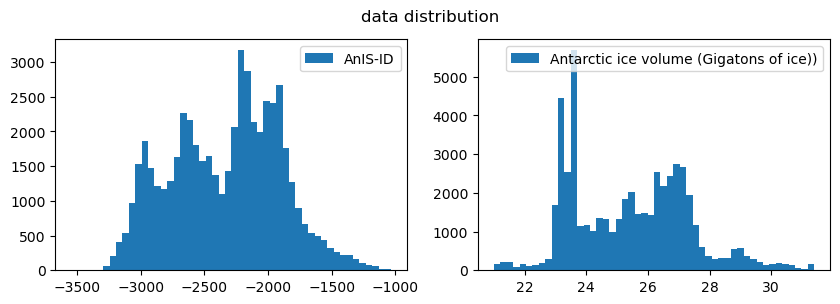

In [72]:
fig, axs = plt.subplots(1,2, figsize=(10,3)) # 1 row, 3 columns
axs[0].hist(seaice['AnIS-ID'],label="AnIS-ID",bins=50)
axs[0].legend()
axs[1].hist(seaice['AnIS-V'],label="Antarctic ice volume (Gigatons of ice))", bins=50)
axs[1].legend()
plt.suptitle("data distribution")
plt.show()

# rainfall in Ireland

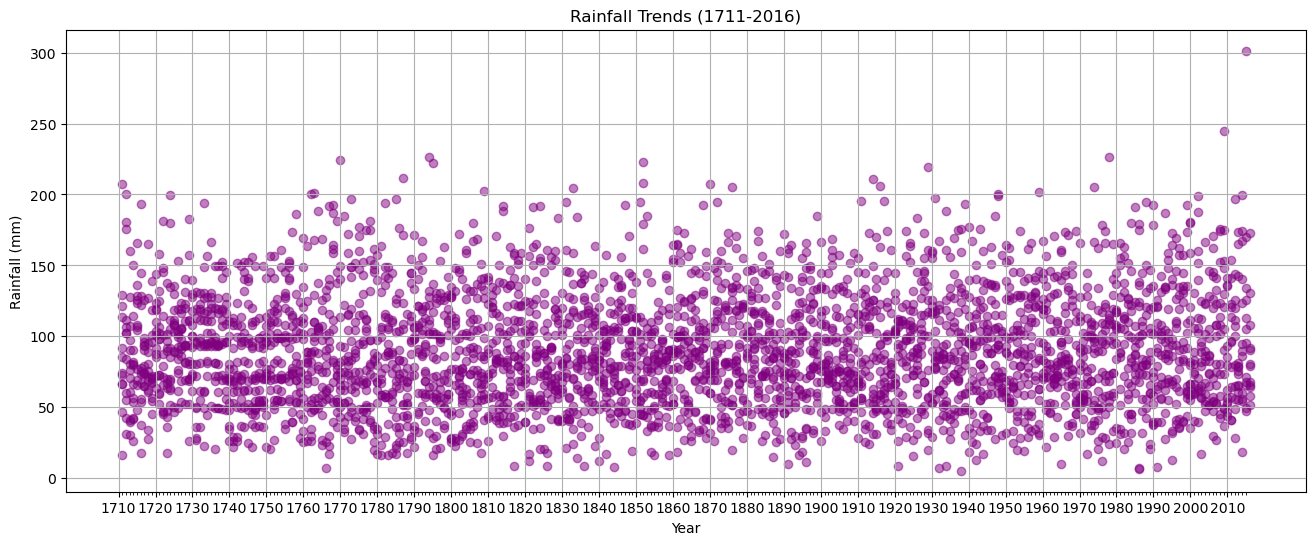

In [73]:
Irish_rainfall = pd.read_csv('data/Rainfall.CSV')
plt.figure(figsize=(16, 6))
ax = plt.gca()

# Plotting the data as individual points
plt.scatter(Irish_rainfall['Year'], Irish_rainfall['Median montly series'], color='purple', alpha=0.5)

# Set x-axis major ticks every 10 years
major_ticks = range(1710, 2017, 10)
ax.set_xticks(major_ticks)

# Set minor ticks between major ticks
minor_ticks = range(1711, 2016, 1)
ax.set_xticks(minor_ticks, minor=True)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Trends (1711-2016)')

# Show grid and plot
plt.grid(True)
plt.show()

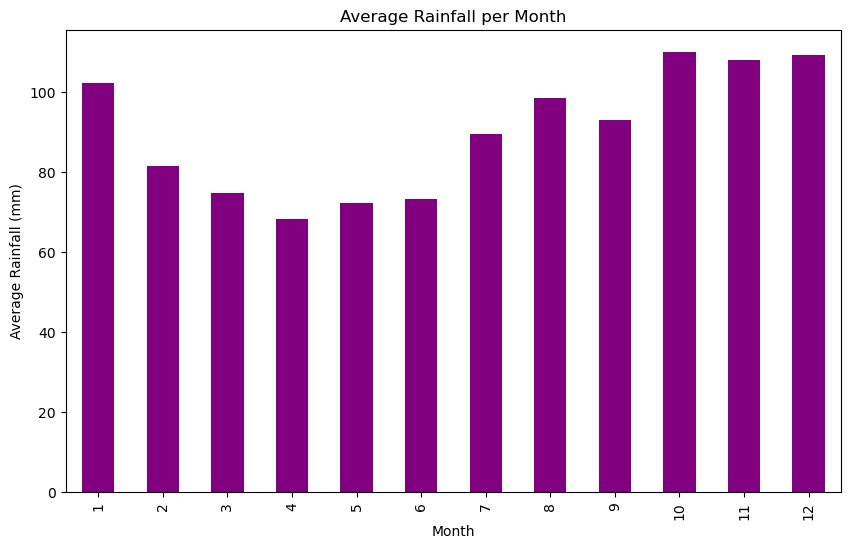

In [74]:
monthly_rainfall = Irish_rainfall.groupby('Month')['Median montly series'].mean()

plt.figure(figsize=(10, 6))
monthly_rainfall.plot(kind='bar', color='purple')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.title('Average Rainfall per Month')
plt.show()

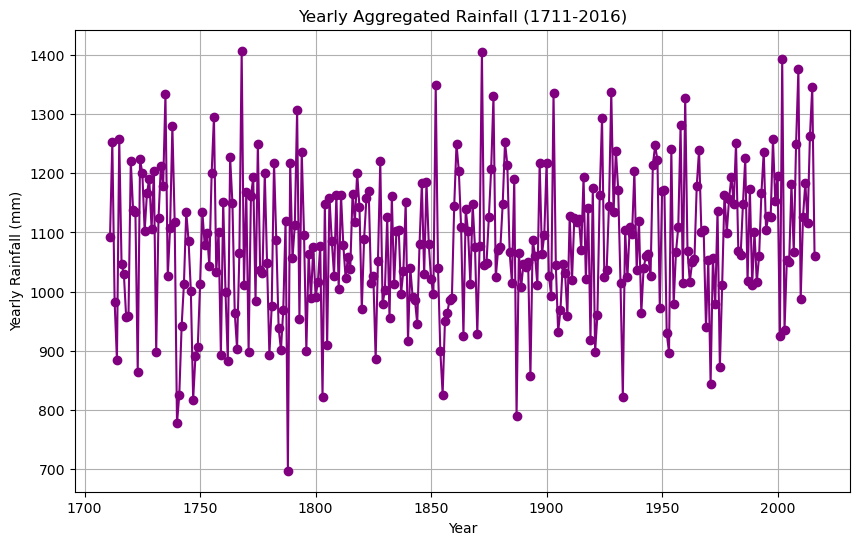

In [75]:
Irish_rainfall['Date'] = pd.to_datetime(Irish_rainfall[['Year', 'Month']].assign(day=1))


yearly_rainfall = Irish_rainfall.groupby(Irish_rainfall['Date'].dt.year)['Median montly series'].sum()


plt.figure(figsize=(10, 6))
plt.plot(yearly_rainfall.index, yearly_rainfall.values, marker='o', linestyle='-', color='purple')
plt.xlabel('Year')
plt.ylabel('Yearly Rainfall (mm)')
plt.title('Yearly Aggregated Rainfall (1711-2016)')
plt.grid(True)
plt.show()

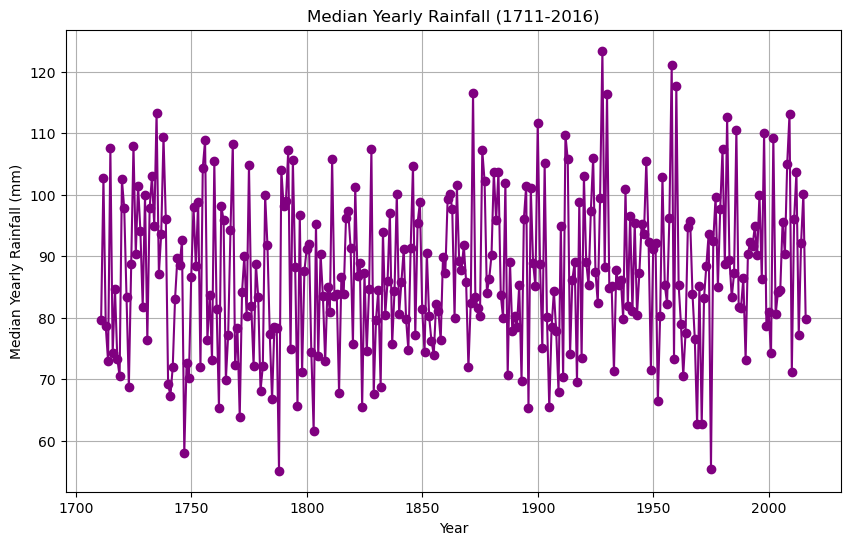

In [76]:
Irish_rainfall['Date'] = pd.to_datetime(Irish_rainfall[['Year', 'Month']].assign(day=1))

# Calculate median yearly rainfall
yearly_median_rainfall = Irish_rainfall.groupby(Irish_rainfall['Date'].dt.year)['Median montly series'].median()

# Plot the median yearly rainfall data
plt.figure(figsize=(10, 6))
plt.plot(yearly_median_rainfall.index, yearly_median_rainfall.values, marker='o',  color='purple')
plt.xlabel('Year')
plt.ylabel('Median Yearly Rainfall (mm)')
plt.title('Median Yearly Rainfall (1711-2016)')
plt.grid(True)
plt.show()

In [77]:
yearly_rainfall_dataset = yearly_rainfall.reset_index()
yearly_rainfall_dataset.columns = ['Year', 'Rainfall']

yearly_rainfall_dataset.to_csv('data/yearly_totalrainfall.csv', index=False)
yearly_median_rainfall_dataset = yearly_median_rainfall.reset_index()
yearly_median_rainfall_dataset.columns = ['Year', 'Median rainfall']


yearly_median_rainfall_dataset.to_csv('data/yearly_medianrainfall.csv', index=False)

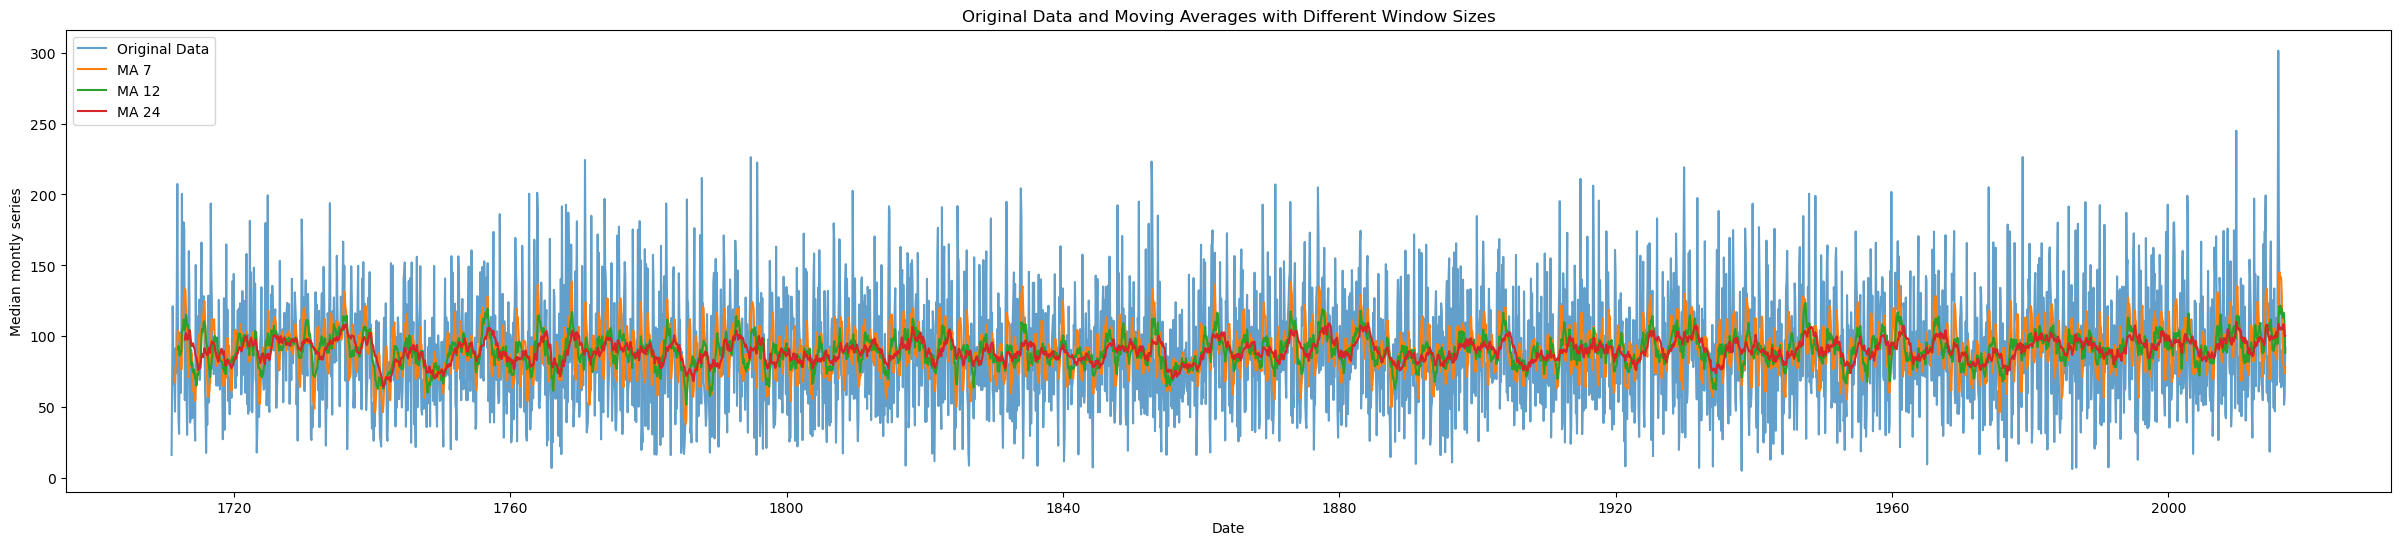

In [78]:
plt.figure(figsize=(30, 6))
plt.plot(Irish_rainfall['Date'], Irish_rainfall['Median montly series'], label='Original Data', alpha=0.7)
for window_size in [7, 12, 24]:
    Irish_rainfall[f'MA_{window_size}'] = Irish_rainfall['Median montly series'].rolling(window=window_size).mean()
    plt.plot(Irish_rainfall['Date'], Irish_rainfall[f'MA_{window_size}'], label=f'MA {window_size}')
plt.xlabel('Date')
plt.ylabel('Median montly series')
plt.title('Original Data and Moving Averages with Different Window Sizes')
plt.legend()
plt.show()

In [79]:
new_co2 = grl.copy()

reference_year = 1950

new_co2['Actual Year'] = reference_year - new_co2['Gasage (yr BP) ']

print(new_co2)

      Gasage (yr BP)   CO2 (ppmv)  sigma mean CO2 (ppmv)    Actual Year
0          -51.030000  368.022488               0.060442    2001.030000
1          -48.000000  361.780737               0.370000    1998.000000
2          -46.279272  359.647793               0.098000    1996.279272
3          -44.405642  357.106740               0.159923    1994.405642
4          -43.080000  353.946685               0.043007    1993.080000
...               ...         ...                    ...            ...
1896    803925.284376  202.921723               2.064488 -801975.284376
1897    804009.870607  207.498645               0.915083 -802059.870607
1898    804522.674630  204.861938               1.642851 -802572.674630
1899    805132.442334  202.226839               0.689587 -803182.442334
1900    805668.868405  207.285440               2.202808 -803718.868405

[1901 rows x 4 columns]


In [80]:
end_value = 1711
filtered_co2 = new_co2[new_co2['Actual Year'] >= end_value]
print(filtered_co2)

     Gasage (yr BP)   CO2 (ppmv)  sigma mean CO2 (ppmv)  Actual Year
0         -51.030000  368.022488               0.060442  2001.030000
1         -48.000000  361.780737               0.370000  1998.000000
2         -46.279272  359.647793               0.098000  1996.279272
3         -44.405642  357.106740               0.159923  1994.405642
4         -43.080000  353.946685               0.043007  1993.080000
..               ...         ...                    ...          ...
178       200.880100  277.600074               0.634933  1749.119900
179       208.742800  276.809000               0.941732  1741.257200
180       216.128000  278.310942               0.941746  1733.872000
181       226.992600  277.013310               0.941734  1723.007400
182       227.135600  278.270110               1.267086  1722.864400

[183 rows x 4 columns]


In [81]:
new_temp = epica.copy()

reference_year = 1950


new_temp['Actual Year'] = reference_year - new_temp['EDC3béta']

print(new_temp.head())

   bag  ztop  EDC3béta   AICC2012  deutfinal   temp  acc-EDC3beta  Actual Year
0    1  0.00 -50.00000 -55.000000        NaN  218.3      3.105321   2000.00000
1    2  0.55 -43.55977 -50.513333        NaN  218.3      3.104805   1993.55977
2    3  1.10 -37.44019 -46.026667        NaN  218.3      3.104404   1987.44019
3    4  1.65 -31.64156 -41.540000        NaN  218.3      3.104025   1981.64156
4    5  2.20 -24.55278 -34.516667        NaN  218.3      3.103453   1974.55278


In [82]:
filtered_seaice = seaice.copy()

# Set the reference year to 1950 by adjusting the value representing the present (2014) to 1950
filtered_seaice['Transformed Year'] = 1950 - ((filtered_seaice['age_calkaBP'] * 100) + 2014)

print(filtered_seaice.tail())

# Save the transformed ice data to a CSV file
filtered_seaice.to_csv('filtered_seaice.csv', index=False)

       age_calkaBP  d18Obenth  d18Osw  d18Otemp  sealev  tempanomNH  EuIS-sc  \
52996         -0.4     -0.029  -0.021    -0.008  -0.799      -0.258   -0.590   
52997         -0.3     -0.030  -0.022    -0.008  -0.762      -0.297   -0.591   
52998         -0.2     -0.030  -0.022    -0.008  -0.727      -0.345   -0.591   
52999         -0.1     -0.030  -0.023    -0.007  -0.693      -0.400   -0.591   
53000          0.0     -0.030  -0.023    -0.007  -0.659      -0.465   -0.591   

       NaIS-sc  AIS-sc  GrIS-sc  AnIS-V  AnIS-ID  Transformed Year  
52996   -0.839 -54.333   -6.983    25.1  -2249.7             -24.0  
52997   -0.836 -54.340   -6.942    25.1  -2208.6             -34.0  
52998   -0.834 -54.351   -6.901    25.1  -2208.8             -44.0  
52999   -0.832 -54.360   -6.859    25.1  -2197.4             -54.0  
53000   -0.830 -54.369   -6.818    25.1  -2211.1             -64.0  


In [83]:
temp_for_seaice = epica.copy()

end_year = 530000
# Filter the DataFrame based on the condition where 'EDC3béta' reaches or exceeds the specified value
temp_for_seaice = temp_for_seaice[temp_for_seaice['EDC3béta'] <= end_year]
print(temp_for_seaice)

       bag     ztop      EDC3béta       AICC2012  deutfinal   temp  \
0        1     0.00     -50.00000     -55.000000        NaN  218.3   
1        2     0.55     -43.55977     -50.513333        NaN  218.3   
2        3     1.10     -37.44019     -46.026667        NaN  218.3   
3        4     1.65     -31.64156     -41.540000        NaN  218.3   
4        5     2.20     -24.55278     -34.516667        NaN  218.3   
...    ...      ...           ...            ...        ...    ...   
5308  5309  2919.40  527152.10000  548281.000000     -435.0  210.6   
5309  5310  2919.95  527728.80000  548806.000000     -436.4  210.4   
5310  5311  2920.50  528319.40000  549331.000000     -437.0  210.3   
5311  5312  2921.05  528915.60000  549804.000000     -435.6  210.5   
5312  5313  2921.60  529498.10000  550277.000000     -429.9  211.4   

      acc-EDC3beta  
0         3.105321  
1         3.104805  
2         3.104404  
3         3.104025  
4         3.103453  
...            ...  
5308      1.

In [84]:
co2_for_seaice = grl.copy()

co2_for_seaice = co2_for_seaice[co2_for_seaice['Gasage (yr BP) '] <= end_year]
print(co2_for_seaice)

      Gasage (yr BP)   CO2 (ppmv)  sigma mean CO2 (ppmv)
0          -51.030000  368.022488               0.060442
1          -48.000000  361.780737               0.370000
2          -46.279272  359.647793               0.098000
3          -44.405642  357.106740               0.159923
4          -43.080000  353.946685               0.043007
...               ...         ...                    ...
1451    526107.000000  233.700000               0.700000
1452    526895.806061  230.300000               0.800000
1453    527698.690909  227.800000               0.600000
1454    528516.690909  224.700000               1.900000
1455    529403.430303  222.700000               1.000000

[1456 rows x 3 columns]


In [85]:
end_value = 1711.00  
filtered_temp = new_temp[new_temp['Actual Year'] >= end_value]

print(filtered_temp)
filtered_temp.to_csv('filtered_temp.csv', index=False)

    bag   ztop    EDC3béta    AICC2012  deutfinal   temp  acc-EDC3beta  \
0     1   0.00  -50.000000  -55.000000        NaN  218.3      3.105321   
1     2   0.55  -43.559770  -50.513333        NaN  218.3      3.104805   
2     3   1.10  -37.440190  -46.026667        NaN  218.3      3.104404   
3     4   1.65  -31.641560  -41.540000        NaN  218.3      3.104025   
4     5   2.20  -24.552780  -34.516667        NaN  218.3      3.103453   
5     6   2.75  -17.784220  -27.493333        NaN  218.3      3.102677   
6     7   3.30  -11.013050  -20.470000        NaN  218.3      3.101557   
7     8   3.85   -3.270300  -12.213333        NaN  218.3      3.099708   
8     9   4.40    5.447842   -3.956667        NaN  218.3      3.096691   
9    10   4.95   13.529990    4.300000        NaN  218.3      3.092812   
10   11   5.50   22.272840   13.220000        NaN  218.3      3.087226   
11   12   6.05   30.709870   22.140000        NaN  218.3      3.080266   
12   13   6.60   38.517570   31.060000

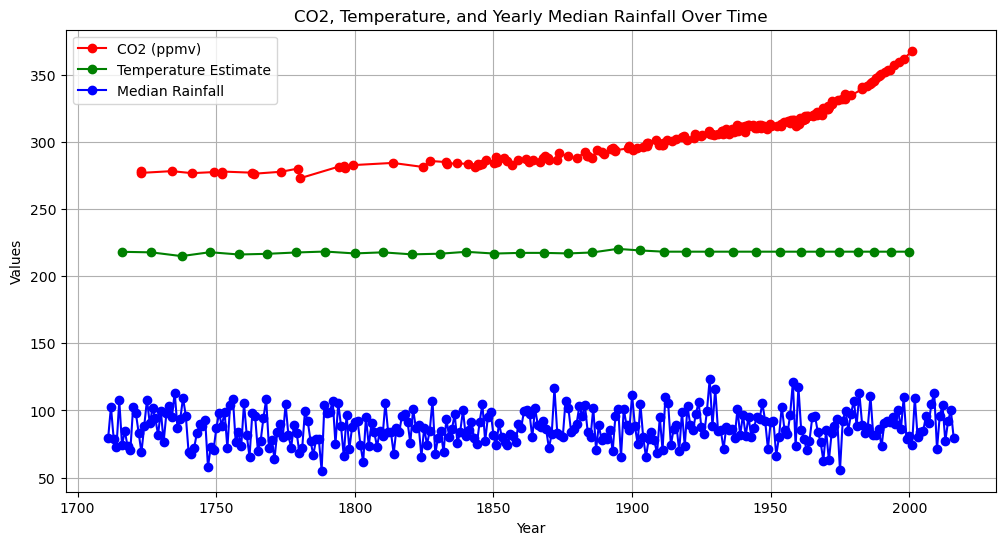

In [86]:
yearco2 = filtered_co2['Actual Year']
yeartemp = filtered_temp['Actual Year']
yearrain = yearly_median_rainfall_dataset['Year']

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting CO2 data against year
plt.plot(yearco2, filtered_co2['CO2 (ppmv)'], marker='o', linestyle='-', color='red', label='CO2 (ppmv)')

# Plotting temperature data against year
plt.plot(yeartemp, filtered_temp['temp'], marker='o', linestyle='-', color='green', label='Temperature Estimate')

# Plotting yearly median rainfall against year
plt.plot(yearrain, yearly_median_rainfall_dataset['Median rainfall'], marker='o', linestyle='-', color='blue', label='Median Rainfall')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('CO2, Temperature, and Yearly Median Rainfall Over Time')

# Display legend
ax.legend()

# Show plot
plt.grid(True)
plt.show()

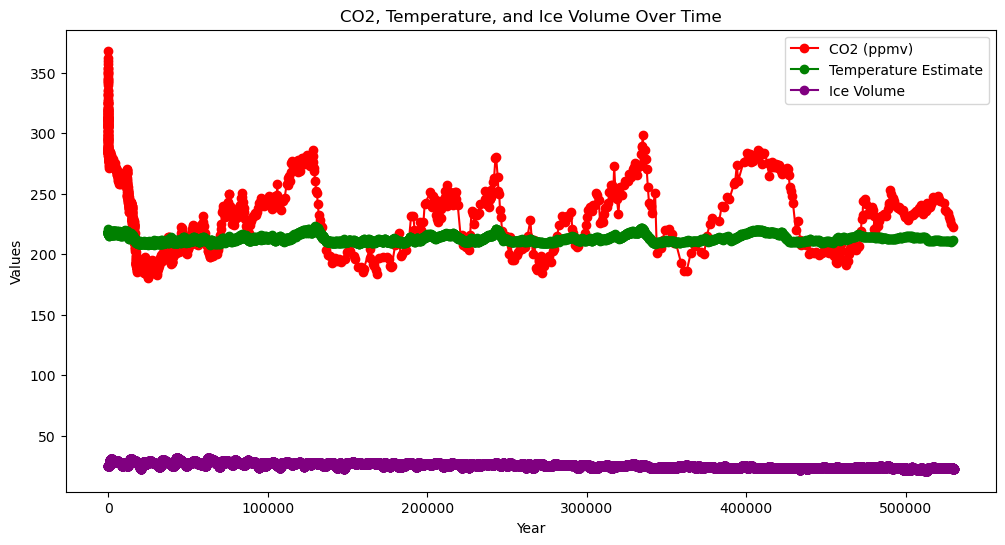

In [87]:
fig, ax = plt.subplots(figsize=(12, 6))


plt.plot(co2_for_seaice['Gasage (yr BP) '], co2_for_seaice['CO2 (ppmv)'], marker='o', linestyle='-', color='red', label='CO2 (ppmv)')


plt.plot(temp_for_seaice['EDC3béta'], temp_for_seaice['temp'], marker='o', linestyle='-', color='green', label='Temperature Estimate')


plt.plot(filtered_seaice['Transformed Year'], filtered_seaice['AnIS-V'], marker='o', linestyle='-', color='purple', label='Ice Volume')

ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('CO2, Temperature, and Ice Volume Over Time')

ax.legend()
plt.show()

In [88]:
correlation_coefficients = pd.DataFrame({
    'Rainfall vs CO2': filtered_co2['CO2 (ppmv)'].corr(yearly_median_rainfall_dataset['Median rainfall']),
    'Rainfall vs Temperature': filtered_temp['temp'].corr(yearly_median_rainfall_dataset['Median rainfall'])
}, index=[0])

#
print(correlation_coefficients)

raincorr = pd.DataFrame({
    'Rainfall vs CO2': filtered_co2['CO2 (ppmv)'].corr(yearly_rainfall_dataset['Rainfall']),
    'Rainfall vs Temperature': filtered_temp['temp'].corr(yearly_rainfall_dataset['Rainfall'])
}, index=[0])

print(raincorr)

   Rainfall vs CO2  Rainfall vs Temperature
0         0.018008                -0.079192
   Rainfall vs CO2  Rainfall vs Temperature
0         0.038071                -0.003952


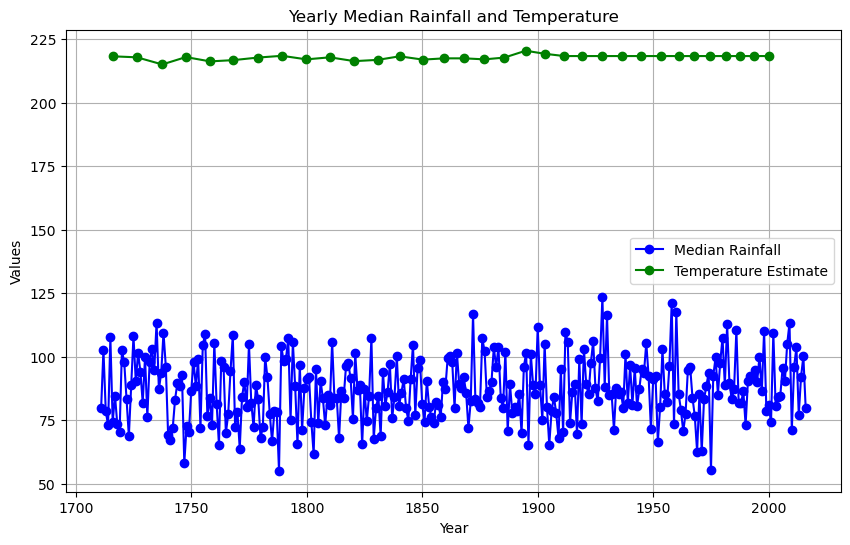

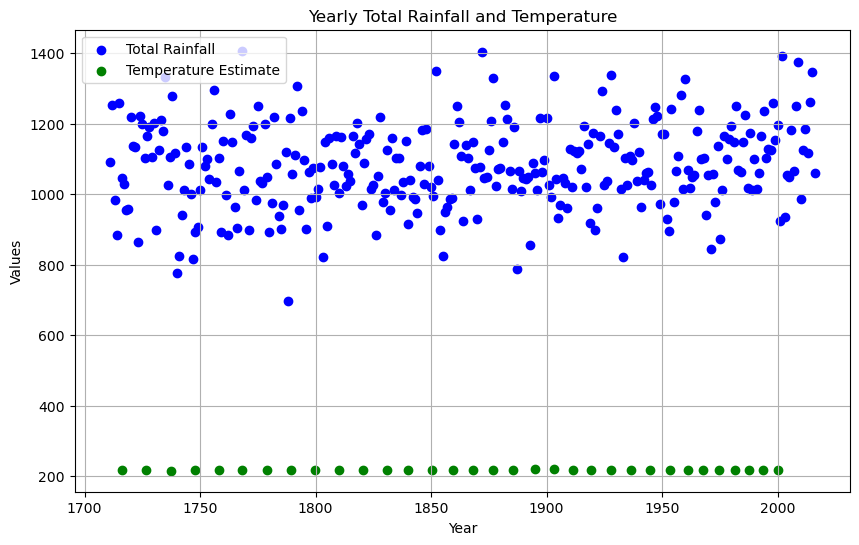

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(yearrain, yearly_median_rainfall_dataset['Median rainfall'], marker='o', linestyle='-', color='blue', label='Median Rainfall')
plt.plot(yeartemp, filtered_temp['temp'], marker='o', linestyle='-', color='green', label='Temperature Estimate')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Yearly Median Rainfall and Temperature')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(yearrain, yearly_rainfall_dataset['Rainfall'], color='blue', label='Total Rainfall')
plt.scatter(yeartemp, filtered_temp['temp'], color='green', label='Temperature Estimate')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Yearly Total Rainfall and Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [90]:
total_data = pd.DataFrame({
    'Year': yearly_rainfall_dataset['Year'],
    'CO2': filtered_co2['CO2 (ppmv)'],
    'Temperature': filtered_temp['temp'],
    'Median Rainfall': yearly_median_rainfall_dataset['Median rainfall'],
    'Rainfall': yearly_rainfall_dataset['Rainfall']
})

total_data.to_csv('.total_data.csv', index=False)
total_data.to_json('.total_data.json')

# Calculate the correlation matrix
correlation_matrix = total_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                     Year       CO2  Temperature  Median Rainfall  Rainfall
Year             1.000000 -0.959388    -0.519191         0.098249  0.134625
CO2             -0.959388  1.000000     0.495724         0.018008  0.038071
Temperature     -0.519191  0.495724     1.000000        -0.079192 -0.003952
Median Rainfall  0.098249  0.018008    -0.079192         1.000000  0.821663
Rainfall         0.134625  0.038071    -0.003952         0.821663  1.000000


c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variab

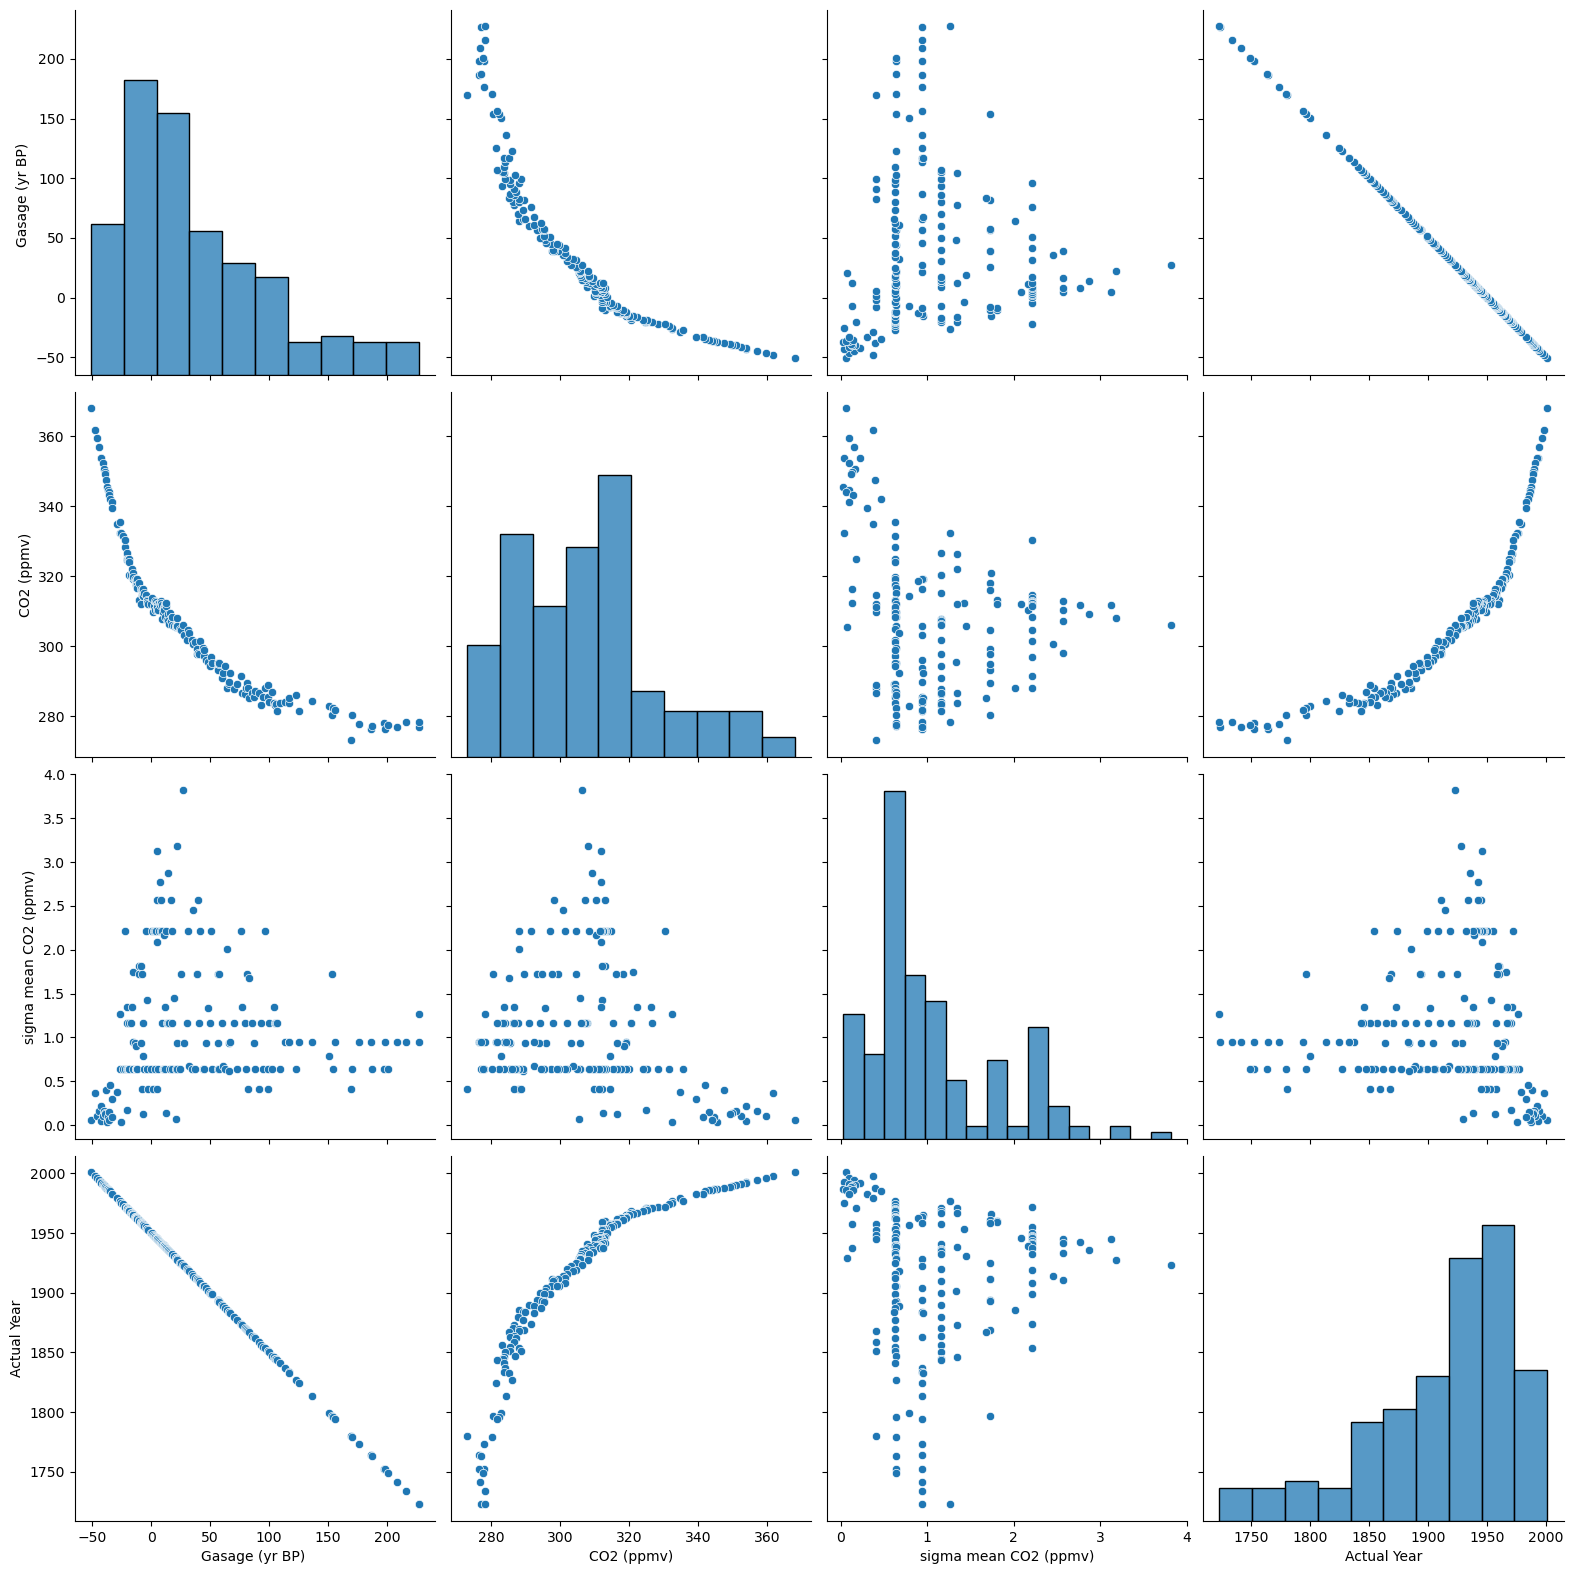

In [91]:
sns.pairplot(filtered_co2, height=4, palette=['blue', 'purple', 'blueviolet'])

c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variab

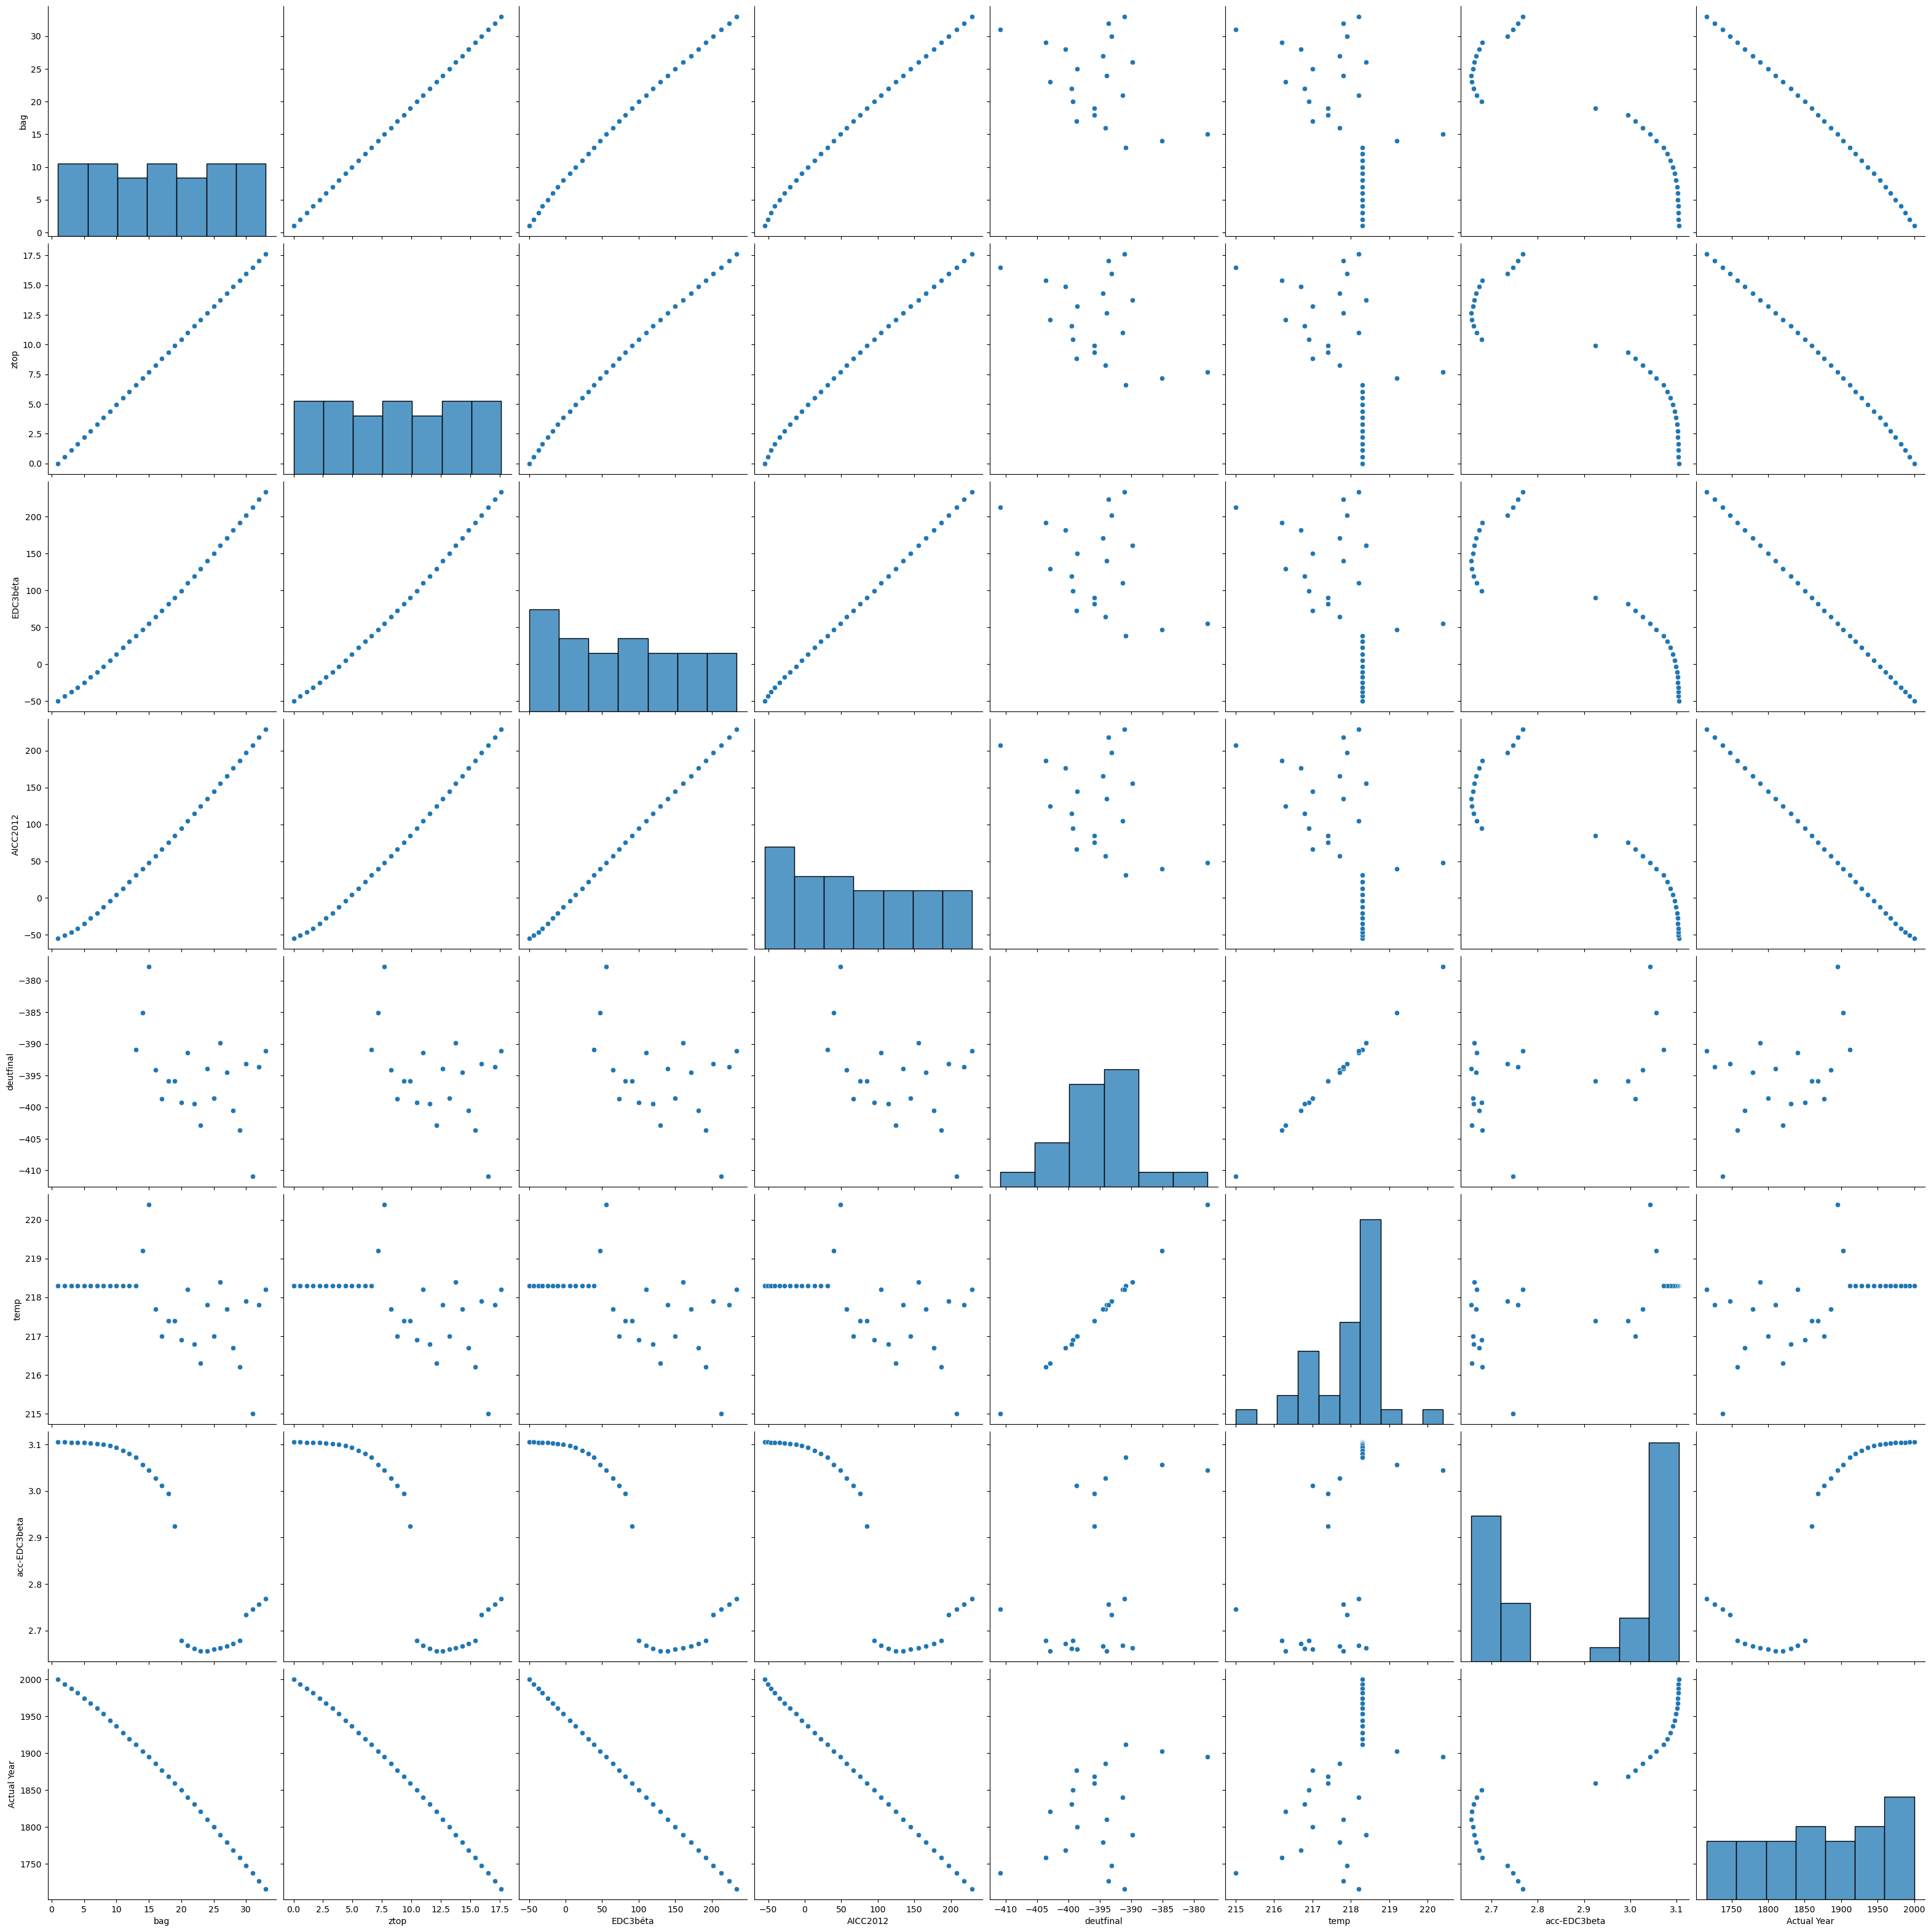

In [92]:
sns.pairplot(filtered_temp, height=4, palette=['blue', 'purple', 'blueviolet'])

Text(0.5, 1.0, 'Boxplots of Temperature')

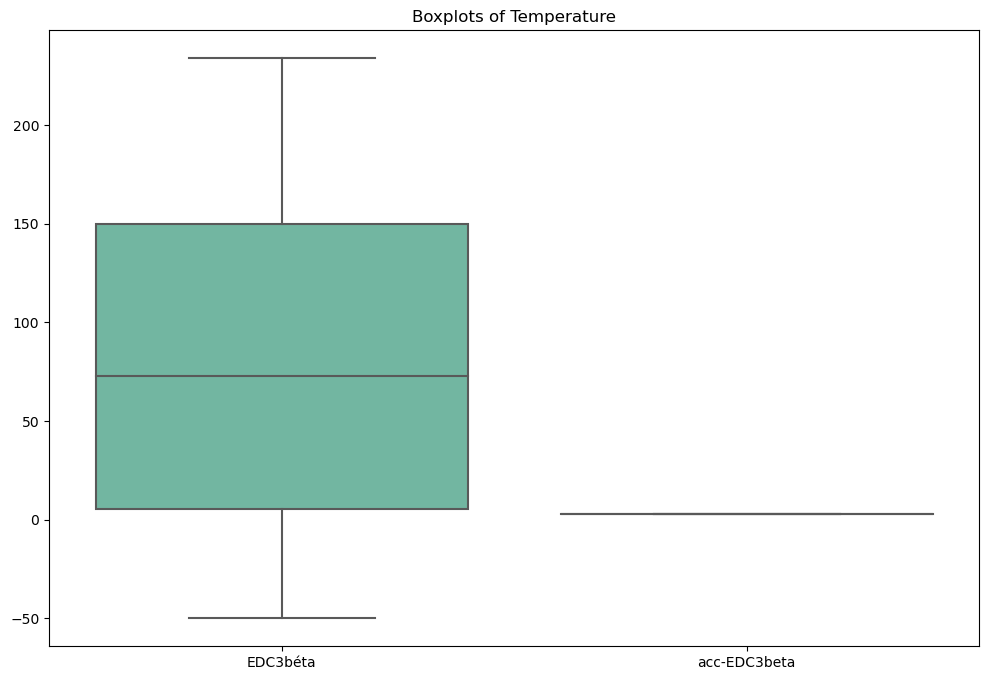

In [93]:
fig, ax = plt.subplots(figsize=(12,8))
df2 = filtered_temp[['EDC3béta', 'acc-EDC3beta']]
ax = sns.boxplot(data=df2, orient="v", palette="Set2") 
ax.set_title("Boxplots of Temperature")

Text(0.5, 1.0, 'Boxplots of CO2')

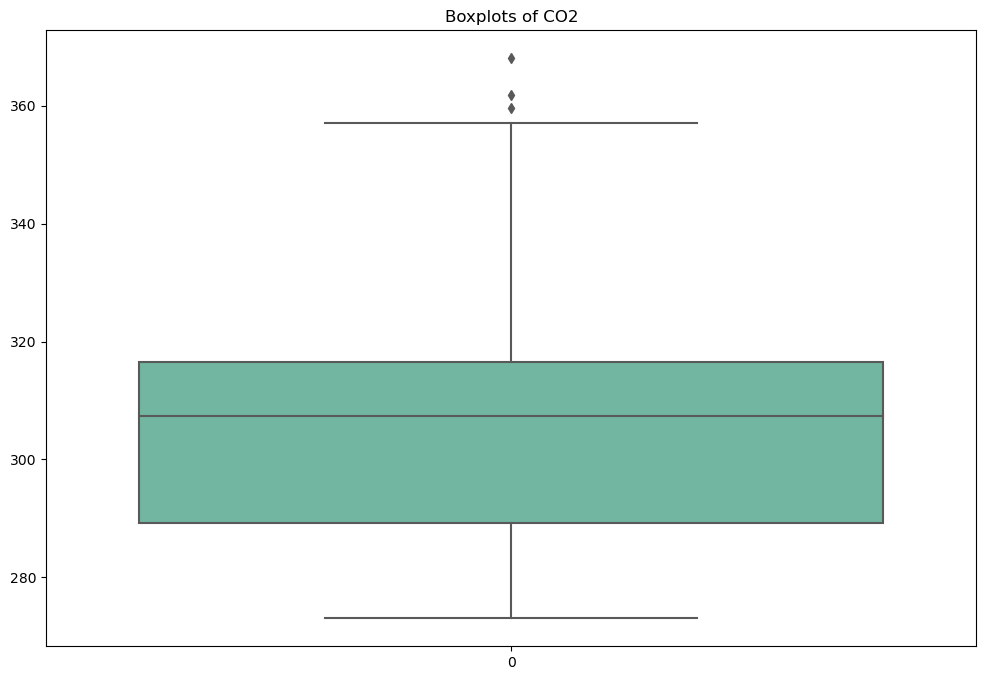

In [94]:
fig, ax = plt.subplots(figsize=(12,8))
df3 = filtered_co2['CO2 (ppmv)']
ax = sns.boxplot(data=df3, orient="v", palette="Set2")  
ax.set_title("Boxplots of CO2")

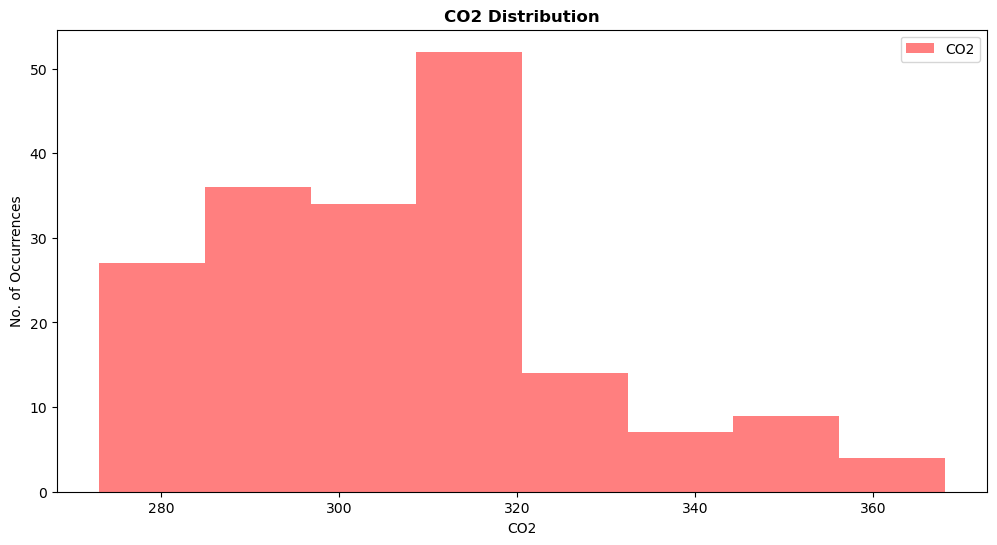

In [95]:
fig, ax = plt.subplots(figsize = (12,6))

ax.set_title("CO2 Distribution", fontweight='bold') 
ax.set(xlabel='CO2')    
ax.set(ylabel="No. of Occurrences") 
ax.hist(filtered_co2['CO2 (ppmv)'], bins=8, alpha=0.5, label="CO2", color='red')  
ax.legend(loc='upper right')

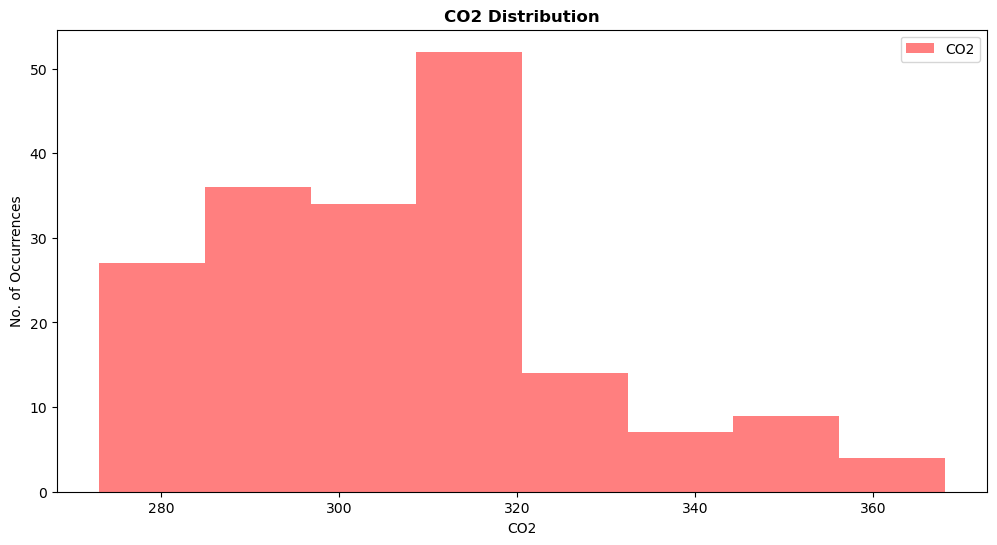

In [96]:
fig, ax = plt.subplots(figsize = (12,6))

ax.set_title("CO2 Distribution", fontweight='bold') 
ax.set(xlabel='CO2')    
ax.set(ylabel="No. of Occurrences") 
ax.hist(filtered_co2['CO2 (ppmv)'], bins=8, alpha=0.5, label="CO2", color='red')  
ax.legend(loc='upper right')

In [97]:
Irish_rainfall.head()

,Year,Month,Median montly series,Date,MA_7,MA_12,MA_24
0,1711,1,16.4,1711-01-01,NaN,NaN,NaN
1,1711,2,73.1,1711-02-01,NaN,NaN,NaN
2,1711,3,121.2,1711-03-01,NaN,NaN,NaN
3,1711,4,85.2,1711-04-01,NaN,NaN,NaN
4,1711,5,66.6,1711-05-01,NaN,NaN,NaN


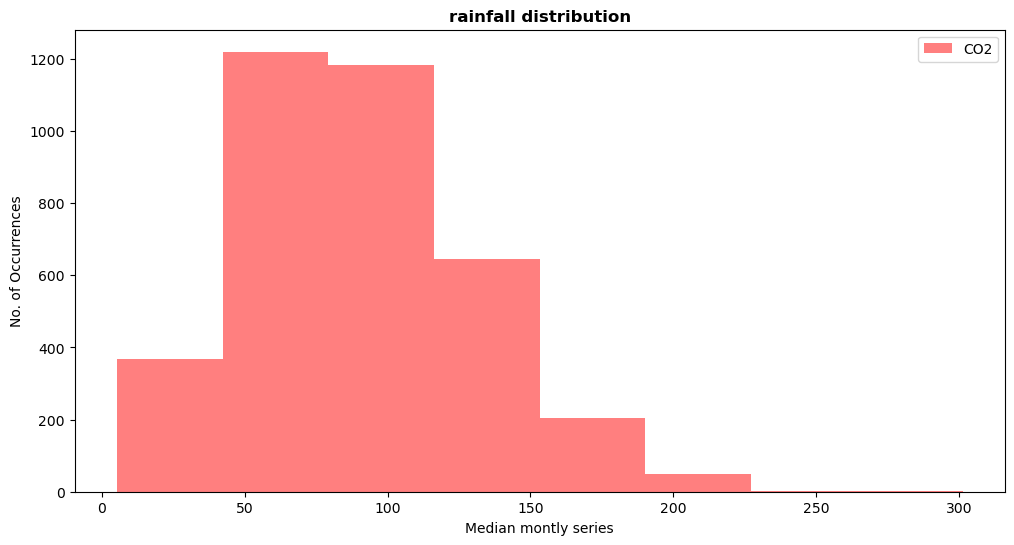

In [98]:
fig, ax = plt.subplots(figsize = (12,6))

ax.set_title("rainfall distribution", fontweight='bold') 
ax.set(xlabel='Median montly series')    
ax.set(ylabel="No. of Occurrences") 
ax.hist(Irish_rainfall['Median montly series'], bins=8, alpha=0.5, label="CO2", color='red')  
ax.legend(loc='upper right')

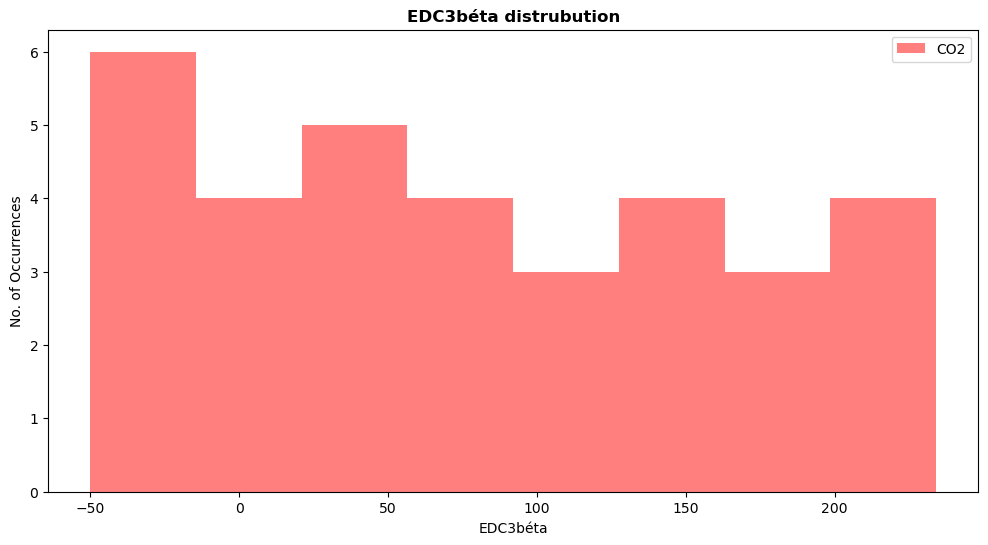

In [99]:
fig, ax = plt.subplots(figsize = (12,6))

ax.set_title("EDC3béta distrubution", fontweight='bold') 
ax.set(xlabel='EDC3béta')    
ax.set(ylabel="No. of Occurrences") 
ax.hist(filtered_temp['EDC3béta'], bins=8, alpha=0.5, label="CO2", color='red')  
ax.legend(loc='upper right')

c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variab

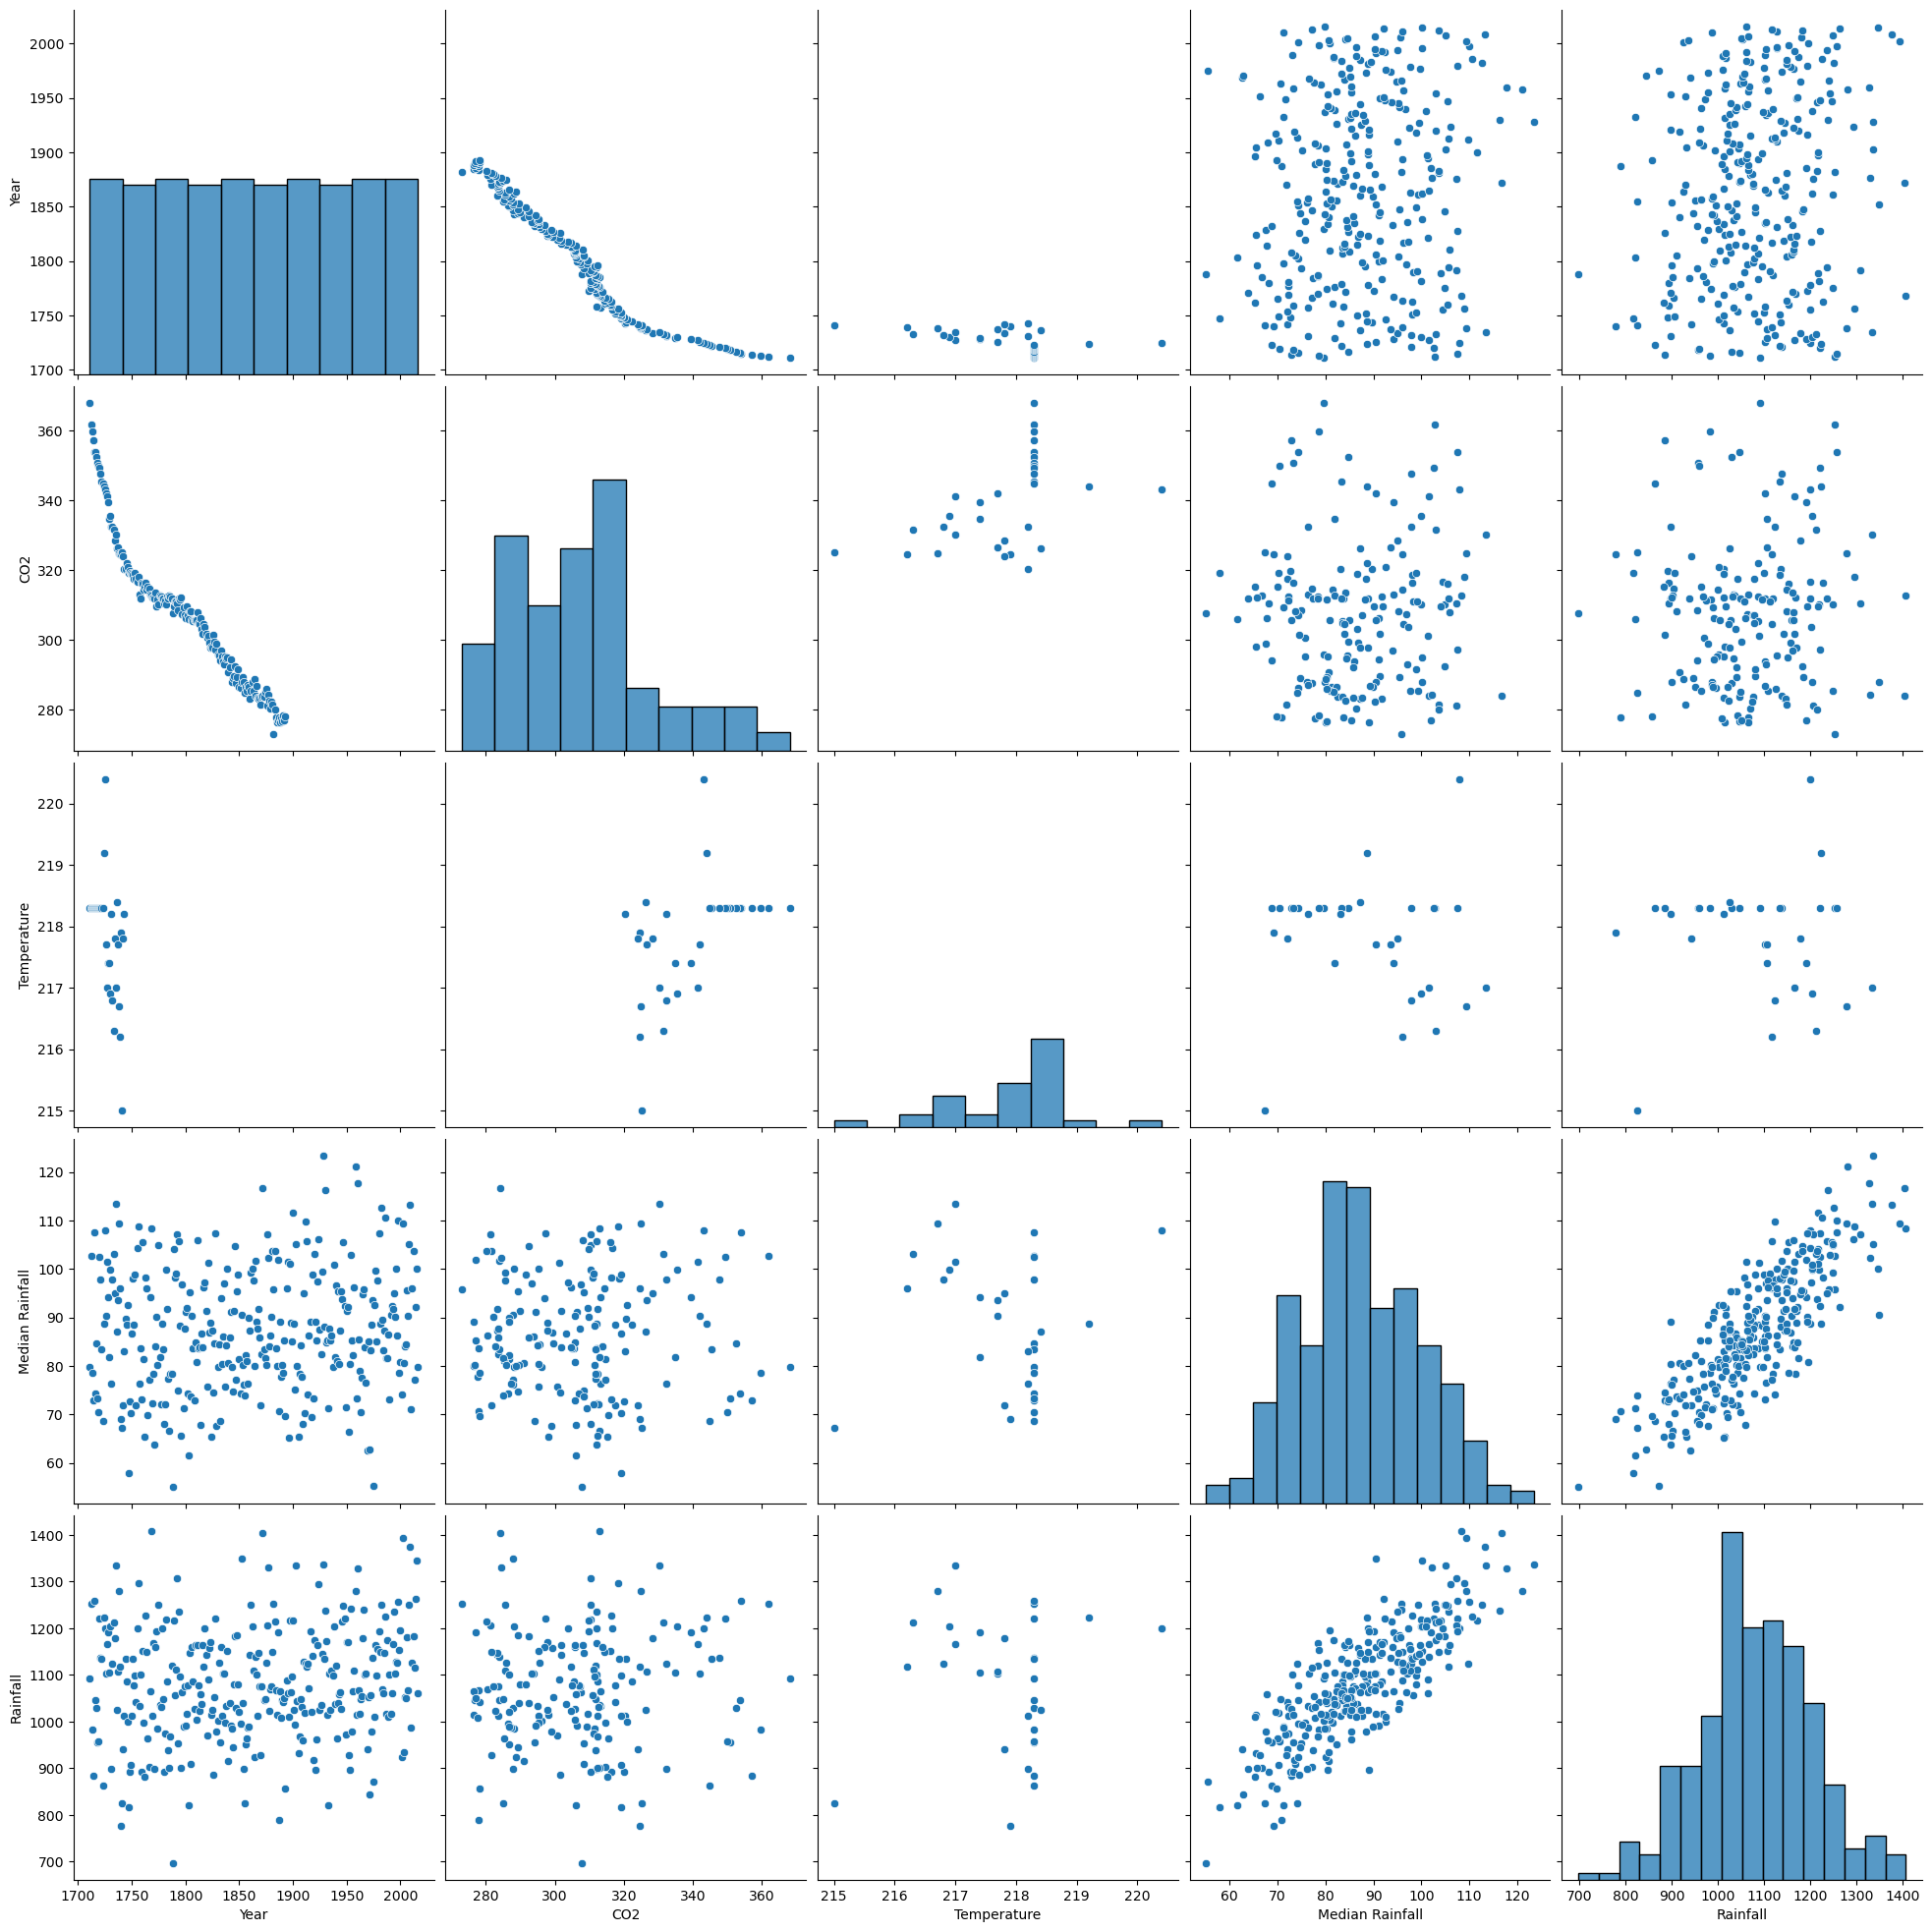

In [100]:
sns.pairplot(total_data, height=4, palette=['blue', 'purple', 'blueviolet'])

In [101]:
filtered_co2.head()

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv),Actual Year
0,-51.030000,368.022488,0.060442,2001.030000
1,-48.000000,361.780737,0.370000,1998.000000
2,-46.279272,359.647793,0.098000,1996.279272
3,-44.405642,357.106740,0.159923,1994.405642
4,-43.080000,353.946685,0.043007,1993.080000


<function matplotlib.pyplot.show(close=None, block=None)>

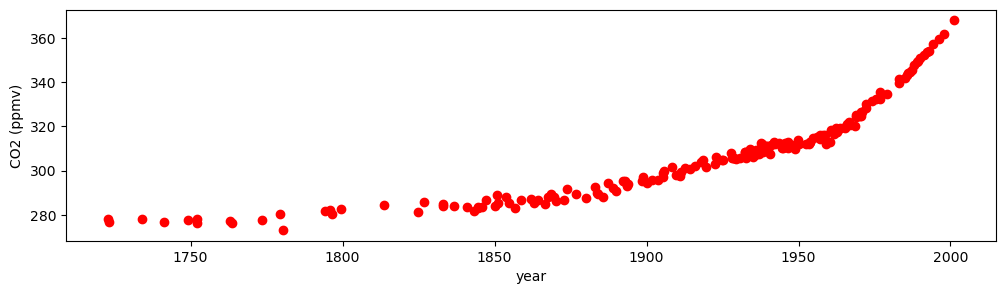

In [102]:
plt.figure(figsize=(12,3))
plt.scatter(filtered_co2['Actual Year'], filtered_co2['CO2 (ppmv)'], color='red', label='CO2 (ppmv)')
plt.xlabel('year')
plt.ylabel('CO2 (ppmv)')
plt.show

In [103]:
filtered_temp.head()

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta,Actual Year
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321,2000.00000
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805,1993.55977
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404,1987.44019
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025,1981.64156
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453,1974.55278


Text(0, 0.5, 'Temperature (Kelvin)')

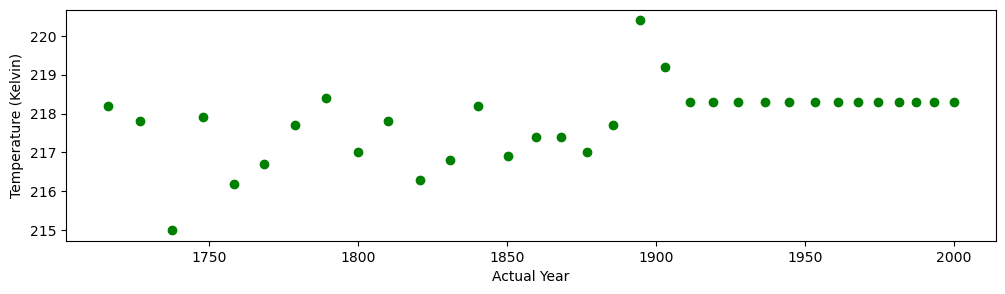

In [104]:
plt.figure(figsize=(12,3))
plt.scatter(filtered_temp['Actual Year'], filtered_temp['temp'], marker='o', color='green', label='Temperature Estimate')
plt.xlabel('Actual Year')
plt.ylabel('Temperature (Kelvin)')

<function matplotlib.pyplot.show(close=None, block=None)>

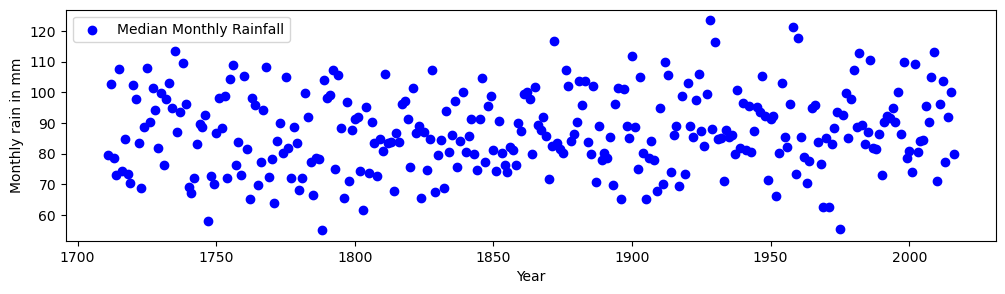

In [105]:
plt.figure(figsize=(12,3))
plt.scatter(yearly_median_rainfall_dataset['Year'], yearly_median_rainfall_dataset['Median rainfall'], color='blue', label='Median Monthly Rainfall')
plt.xlabel('Year')
plt.ylabel('Monthly rain in mm')
plt.legend()
plt.show

Text(0, 0.5, 'Total rain in mm')

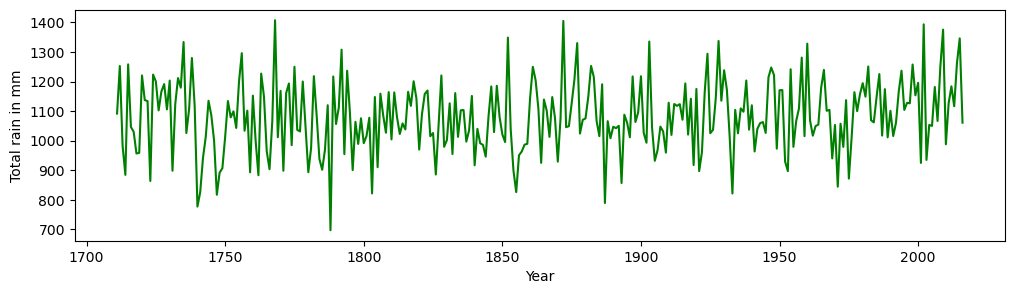

In [106]:
plt.figure(figsize=(12,3))
plt.plot(yearly_rainfall_dataset['Year'], yearly_rainfall_dataset['Rainfall'], color='green', label='Total rainfall')
plt.xlabel('Year')
plt.ylabel('Total rain in mm')

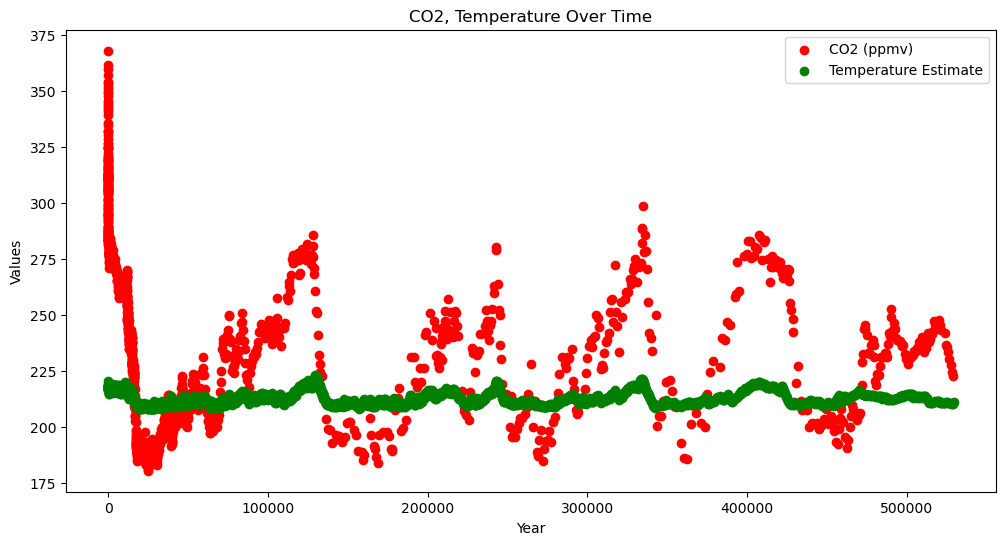

In [107]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting CO2 data against year
plt.scatter(co2_for_seaice['Gasage (yr BP) '], co2_for_seaice['CO2 (ppmv)'], color='red', label='CO2 (ppmv)')

# Plotting temperature data against year
plt.scatter(temp_for_seaice['EDC3béta'], temp_for_seaice['temp'], color='green', label='Temperature Estimate')

ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('CO2, Temperature Over Time')

ax.legend()
plt.show()

In [108]:
cleaned_co2 = filtered_co2[['Actual Year', 'CO2 (ppmv)']]
cleaned_temp = filtered_temp[['Actual Year', 'temp']]
cleaned_co2['Actual Year'] = cleaned_co2['Actual Year'].astype(int)
cleaned_temp['Actual Year'] = cleaned_temp['Actual Year'].astype(int)

print(cleaned_co2)
print(cleaned_temp)




     Actual Year  CO2 (ppmv)
0           2001  368.022488
1           1998  361.780737
2           1996  359.647793
3           1994  357.106740
4           1993  353.946685
..           ...         ...
178         1749  277.600074
179         1741  276.809000
180         1733  278.310942
181         1723  277.013310
182         1722  278.270110

[183 rows x 2 columns]
    Actual Year   temp
0          2000  218.3
1          1993  218.3
2          1987  218.3
3          1981  218.3
4          1974  218.3
5          1967  218.3
6          1961  218.3
7          1953  218.3
8          1944  218.3
9          1936  218.3
10         1927  218.3
11         1919  218.3
12         1911  218.3
13         1902  219.2
14         1894  220.4
15         1885  217.7
16         1876  217.0
17         1868  217.4
18         1859  217.4
19         1850  216.9
20         1840  218.2
21         1830  216.8
22         1820  216.3
23         1810  217.8
24         1799  217.0
25         1789  218.4
26     

C:\Users\keith\AppData\Local\Temp\ipykernel_8076\1643368436.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\keith\AppData\Local\Temp\ipykernel_8076\1643368436.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


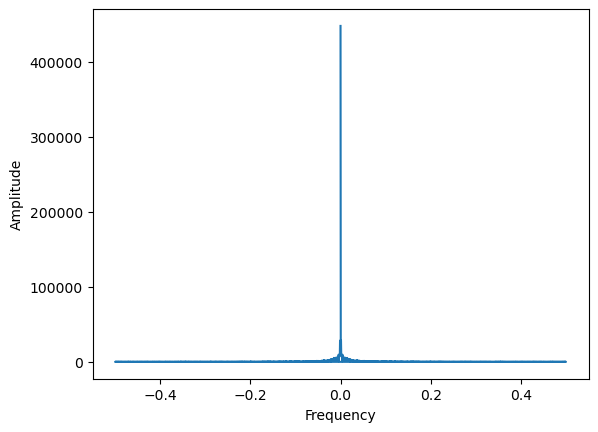

In [109]:
from scipy.fft import fft, fftfreq
import pandas as pd
import scipy.fft

# Select the column with CO2 (ppmv) values
y = grl['CO2 (ppmv)']
y = np.ascontiguousarray(y)
yf = fft(y) # Frequency spectrum
xf = fftfreq(y.size)
plt.plot(xf, np.abs(yf)) # Plot the magnitude of the spectrum
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

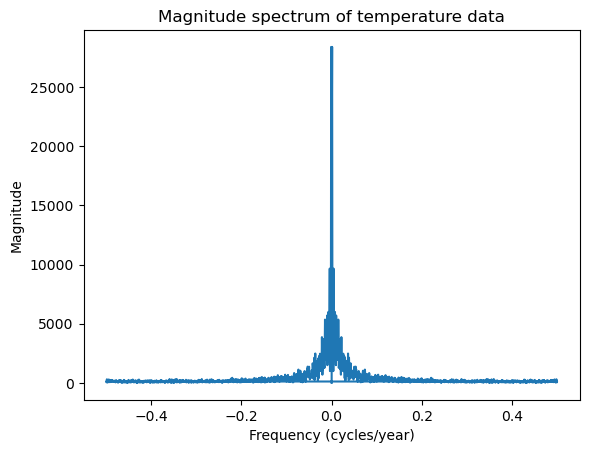

In [110]:
temp = new_co2["CO2 (ppmv)"].to_numpy()

# Subtract the mean to concentrate on temperature fluctuations
temp = temp - np.mean(temp)

# Perform the Fourier transform
Temp = np.fft.fft(temp) # complex spectrum
Temp_mag = np.abs(Temp) # magnitude spectrum
Temp_phase = np.angle(Temp) # phase spectrum
f = np.fft.fftfreq(len(temp), 1) # frequency vector in cycles per year

# Plot the magnitude spectrum in frequency domain
plt.figure()
plt.plot(f, Temp_mag)
plt.xlabel("Frequency (cycles/year)")
plt.ylabel("Magnitude")
plt.title("Magnitude spectrum of temperature data")
#plt.xlim(0, -.5) # zoom in to see the peaks
plt.show()

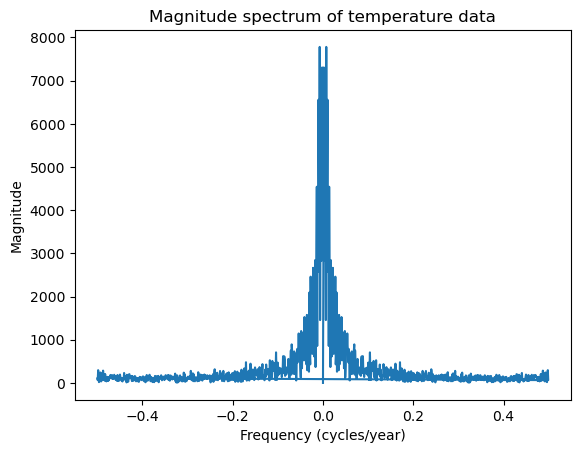

In [111]:
temp = nature["CO2 (ppmv)"].to_numpy()

# Subtract the mean to concentrate on temperature fluctuations
temp = temp - np.mean(temp)

# Perform the Fourier transform
Temp = np.fft.fft(temp) # complex spectrum
Temp_mag = np.abs(Temp) # magnitude spectrum
Temp_phase = np.angle(Temp) # phase spectrum
f = np.fft.fftfreq(len(temp), 1) # frequency vector in cycles per year

# Plot the magnitude spectrum in frequency domain
plt.figure()
plt.plot(f, Temp_mag)
plt.xlabel("Frequency (cycles/year)")
plt.ylabel("Magnitude")
plt.title("Magnitude spectrum of temperature data")
#plt.xlim(0, -.5) # zoom in to see the peaks
plt.show()

In [112]:
ts1= new_co2['CO2 (ppmv)']
ts2= new_temp['temp']

from scipy import signal
corr = signal.correlate(ts1,ts2,mode='same')



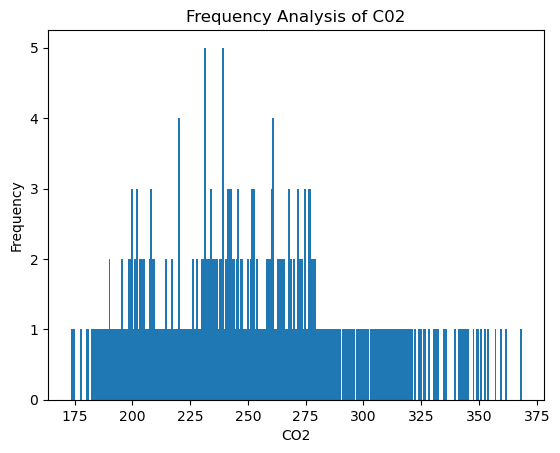

In [113]:
freq = ts1.value_counts()

#plot the frequencies as a bar chart
plt.bar(freq.index, freq.values)
plt.xlabel("CO2")
plt.ylabel("Frequency")
plt.title("Frequency Analysis of C02")
plt.show()

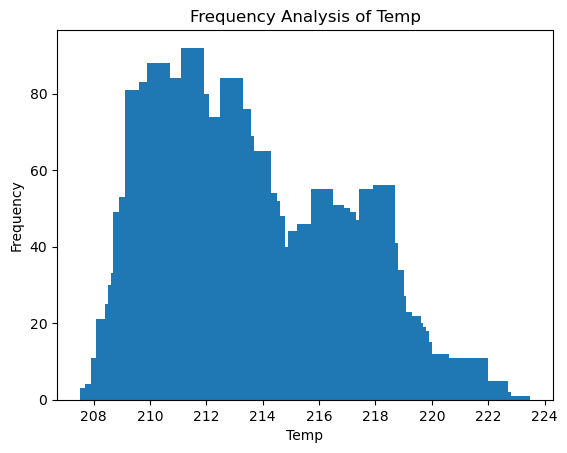

In [114]:
freq = ts2.value_counts()

#plot the frequencies as a bar chart
plt.bar(freq.index, freq.values)
plt.xlabel("Temp")
plt.ylabel("Frequency")
plt.title("Frequency Analysis of Temp")
plt.show()

In [115]:
cleaned_co2 = filtered_co2[['Actual Year', 'CO2 (ppmv)']]
cleaned_temp = filtered_temp[['Actual Year', 'temp']]
cleaned_co2['Year'] = cleaned_co2['Actual Year'].astype(int)
cleaned_temp['Year'] = cleaned_temp['Actual Year'].astype(int)

print(cleaned_co2)
print(cleaned_temp)

yearly_rainfall_dataset = yearly_rainfall_dataset.sort_values(by='Year', ascending=False)
cleaned_rainfall = yearly_rainfall_dataset.reset_index(drop=True)

yearly_median_rainfall_dataset = yearly_median_rainfall_dataset.sort_values(by='Year',ascending=False)
cleaned_medianrainfall = yearly_median_rainfall_dataset.reset_index(drop=True)

# Merge rainfall and co2 based on 'Year' column using an outer join
combined_data = pd.merge(cleaned_rainfall, cleaned_co2, on='Year', how='outer')

# Merge with cleaned_temp based on 'Year' column using an outer join
combined_data = pd.merge(combined_data, cleaned_temp, on='Year', how='outer')
combined_rainfall = pd.merge(combined_data, cleaned_medianrainfall, on='Year', how='outer')

# Check the combined data
print(combined_rainfall)
yearly_rainfall_dataset.to_csv('yearly_rainfall_dataset.csv', index=False)
yearly_rainfall_dataset.to_json('yearly_rainfall_dataset.json')

     Actual Year  CO2 (ppmv)  Year
0    2001.030000  368.022488  2001
1    1998.000000  361.780737  1998
2    1996.279272  359.647793  1996
3    1994.405642  357.106740  1994
4    1993.080000  353.946685  1993
..           ...         ...   ...
178  1749.119900  277.600074  1749
179  1741.257200  276.809000  1741
180  1733.872000  278.310942  1733
181  1723.007400  277.013310  1723
182  1722.864400  278.270110  1722

[183 rows x 3 columns]
    Actual Year   temp  Year
0   2000.000000  218.3  2000
1   1993.559770  218.3  1993
2   1987.440190  218.3  1987
3   1981.641560  218.3  1981
4   1974.552780  218.3  1974
5   1967.784220  218.3  1967
6   1961.013050  218.3  1961
7   1953.270300  218.3  1953
8   1944.552158  218.3  1944
9   1936.470010  218.3  1936
10  1927.727160  218.3  1927
11  1919.290130  218.3  1919
12  1911.482430  218.3  1911
13  1902.997890  219.2  1902
14  1894.794480  220.4  1894
15  1885.563540  217.7  1885
16  1876.944270  217.0  1876
17  1868.276510  217.4  1868
18  1

C:\Users\keith\AppData\Local\Temp\ipykernel_8076\2326361718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\keith\AppData\Local\Temp\ipykernel_8076\2326361718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [116]:
combined_rainfall.head()

,Year,Rainfall,Actual Year_x,CO2 (ppmv),Actual Year_y,temp,Median rainfall
0,2016,1060.7,NaN,NaN,NaN,NaN,79.80
1,2015,1346.0,NaN,NaN,NaN,NaN,100.15
2,2014,1262.7,NaN,NaN,NaN,NaN,92.10
3,2013,1116.5,NaN,NaN,NaN,NaN,77.15
4,2012,1183.7,NaN,NaN,NaN,NaN,103.70


In [117]:
data_for_prediction = combined_rainfall.dropna(subset=['CO2 (ppmv)', 'temp'])

# Prepare the data for linear regression
X = data_for_prediction[['Year']]
y_CO2 = data_for_prediction['CO2 (ppmv)']
y_temp = data_for_prediction['temp']

# Fit linear regression models
reg_CO2 = LinearRegression().fit(X, y_CO2)
reg_temp = LinearRegression().fit(X, y_temp)

# Predict missing values for 2016
pred_CO2_2016 = reg_CO2.predict([[2016]])[0]
pred_temp_2016 = reg_temp.predict([[2016]])[0]

# Update the DataFrame with predicted values

yearly_rainfall_dataset.loc[yearly_rainfall_dataset['Year'] == 2016, 'CO2 (ppmv)'] = pred_CO2_2016

yearly_rainfall_dataset.loc[
yearly_rainfall_dataset['Year'] == 2016, 'temp'] = pred_temp_2016

print(yearly_rainfall_dataset)

# Save the updated data to CSV and JSON files

yearly_rainfall_dataset.to_csv('combined_rainfall_predicted.csv', index=False)

yearly_rainfall_dataset.to_json('combined_rainfall_predicted.json')

     Year  Rainfall  CO2 (ppmv)        temp
305  2016    1060.7  339.050333  218.799164
304  2015    1346.0         NaN         NaN
303  2014    1262.7         NaN         NaN
302  2013    1116.5         NaN         NaN
301  2012    1183.7         NaN         NaN
..    ...       ...         ...         ...
4    1715    1258.0         NaN         NaN
3    1714     884.2         NaN         NaN
2    1713     982.5         NaN         NaN
1    1712    1252.6         NaN         NaN
0    1711    1091.6         NaN         NaN

[306 rows x 4 columns]


c:\Users\keith\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
c:\Users\keith\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


In [118]:
combined_rainfall['CO2 (ppmv)'] = combined_rainfall['CO2 (ppmv)'].interpolate(method='linear')
combined_rainfall['temp'] = combined_rainfall['temp'].interpolate(method='linear')

# Display the updated DataFrame
print(combined_rainfall)

# Save the updated data to CSV and JSON files
combined_rainfall.to_csv('combined_rainfall_interpolated.csv', index=False)
combined_rainfall.to_json('combined_rainfall_interpolated.json')

     Year  Rainfall  Actual Year_x  CO2 (ppmv)  Actual Year_y   temp  \
0    2016    1060.7            NaN         NaN            NaN    NaN   
1    2015    1346.0            NaN         NaN            NaN    NaN   
2    2014    1262.7            NaN         NaN            NaN    NaN   
3    2013    1116.5            NaN         NaN            NaN    NaN   
4    2012    1183.7            NaN         NaN            NaN    NaN   
..    ...       ...            ...         ...            ...    ...   
356  1715    1258.0            NaN   278.27011            NaN  218.2   
357  1714     884.2            NaN   278.27011            NaN  218.2   
358  1713     982.5            NaN   278.27011            NaN  218.2   
359  1712    1252.6            NaN   278.27011            NaN  218.2   
360  1711    1091.6            NaN   278.27011            NaN  218.2   

     Median rainfall  
0              79.80  
1             100.15  
2              92.10  
3              77.15  
4             103.70

                     Year  Rainfall  Actual Year_x  CO2 (ppmv)  Actual Year_y  \
Year             1.000000  0.122061       0.999990    0.885673       0.999995   
Rainfall         0.122061  1.000000       0.191429    0.118058      -0.073307   
Actual Year_x    0.999990  0.191429       1.000000    0.879895       0.999974   
CO2 (ppmv)       0.885673  0.118058       0.879895    1.000000       0.871893   
Actual Year_y    0.999995 -0.073307       0.999974    0.871893       1.000000   
temp             0.599444 -0.044974       0.583992    0.499098       0.543984   
Median rainfall  0.104077  0.821850       0.186873    0.091113      -0.014951   

                     temp  Median rainfall  
Year             0.599444         0.104077  
Rainfall        -0.044974         0.821850  
Actual Year_x    0.583992         0.186873  
CO2 (ppmv)       0.499098         0.091113  
Actual Year_y    0.543984        -0.014951  
temp             1.000000        -0.022701  
Median rainfall -0.022701         1.

<Axes: >

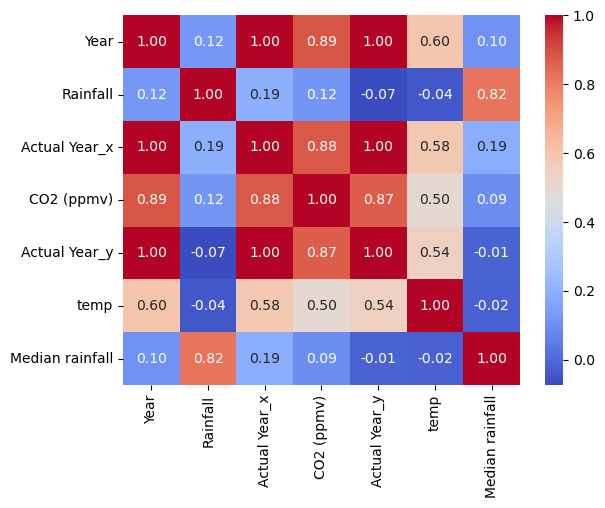

In [119]:
rainfall_matrix = combined_rainfall.corr()

# Display the correlation matrix
print(rainfall_matrix)
sns.heatmap(rainfall_matrix, cmap='coolwarm', annot=True, fmt='.2f')

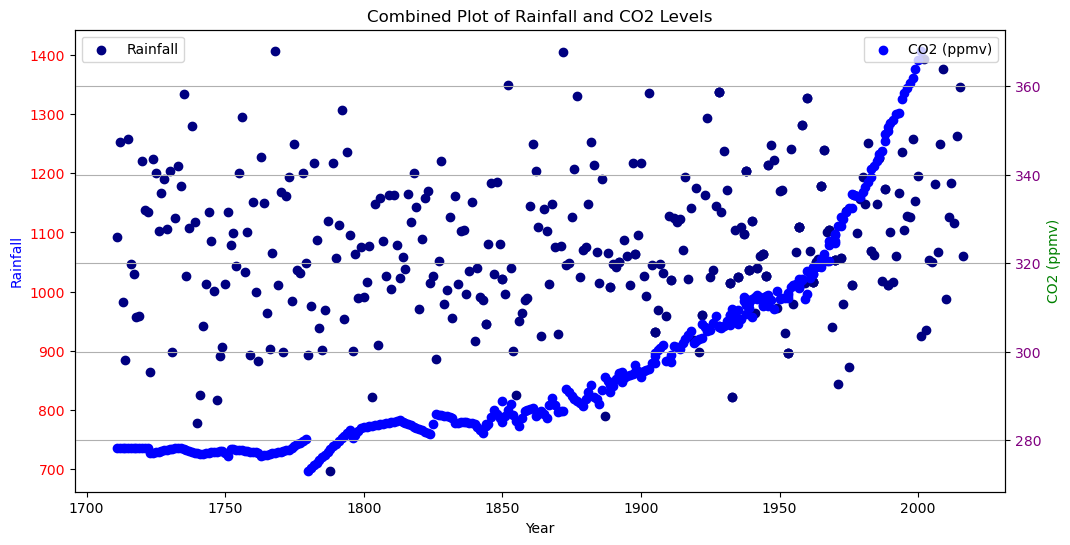

In [120]:
fig, ax1 = plt.subplots(figsize=(12, 6))


ax1.set_xlabel('Year')
ax1.set_ylabel('Rainfall', color='blue')
ax1.scatter(combined_rainfall['Year'], combined_rainfall['Rainfall'], label='Rainfall', color='navy')
ax1.tick_params(axis='y', labelcolor='red')
ax1.legend(loc='upper left')


ax2 = ax1.twinx()
ax2.set_ylabel('CO2 (ppmv)', color='green')
ax2.scatter(combined_rainfall['Year'], combined_rainfall['CO2 (ppmv)'], label='CO2 (ppmv)', color='blue')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.legend(loc='upper right')

plt.title('Combined Plot of Rainfall and CO2 Levels')
plt.grid(True)
plt.show()

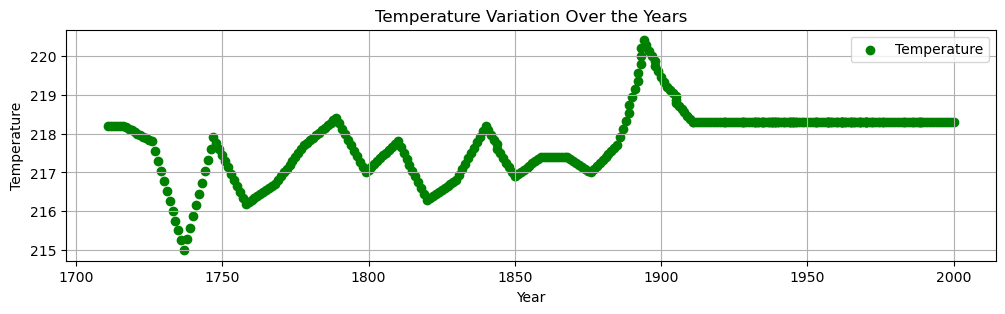

In [121]:
plt.figure(figsize=(12, 3))

plt.scatter(combined_rainfall['Year'], combined_rainfall['temp'], label='Temperature', color='green')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Variation Over the Years')
plt.legend()
plt.grid(True)
plt.show()

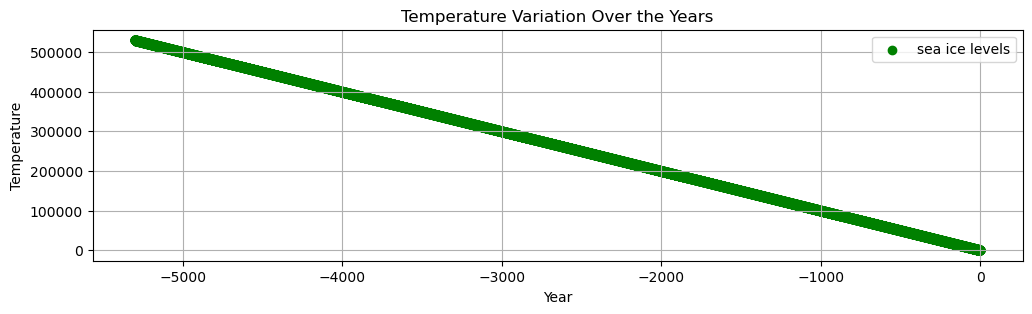

In [125]:
plt.figure(figsize=(12, 3))

plt.scatter(filtered_seaice['age_calkaBP'], filtered_seaice['Transformed Year'], label='sea ice levels', color='green')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Variation Over the Years')
plt.legend()
plt.grid(True)
plt.show()